# Telecom Churn

## Case Study By: Rachel Sharmila & Janarthanan Mani

### Business problem overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

### Business objective and the data
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

### Importing Data

In [1]:
# Importing Pandas and NumPy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
churn_data = pd.read_csv("telecom_churn_data.csv")

In [3]:
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


### Datapreparation 
    Analysing indiviudal columns

#### Removing columns which add no value to analysis

In [5]:
churn_data["circle_id"].value_counts()

109    99999
Name: circle_id, dtype: int64

In [6]:
churn_data= churn_data.drop(["circle_id"], axis=1)

In [7]:
churn_data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [8]:
churn_data=churn_data.set_index("mobile_number")

In [9]:
#no variance in data for last_date_of_month_6	last_date_of_month_7	last_date_of_month_8 and 
#last_date_of_month_9 hence removing those columns
churn_data= churn_data.drop(["last_date_of_month_6","last_date_of_month_7", "last_date_of_month_8", "last_date_of_month_9"], axis=1)
churn_data

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
mobile_number,,,,,,,,,,,,,,,,,,,,,
7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,...,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
7001865778,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,...,0,NaN,1.0,1.0,NaN,1006,0.00,0.00,0.00,0.00
7001625959,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,55.24,37.26,...,0,NaN,NaN,NaN,1.0,1103,0.00,0.00,4.17,0.00
7001204172,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,54.39,310.98,...,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
7000142493,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,149.44,83.89,...,0,0.0,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7001548952,0.0,0.0,0.0,18.471,69.161,57.530,29.950,5.40,3.36,5.91,...,0,NaN,NaN,NaN,NaN,3199,0.00,0.00,0.00,0.00
7000607688,0.0,0.0,0.0,112.201,77.811,79.081,140.835,29.26,18.13,16.06,...,0,NaN,NaN,NaN,NaN,2052,0.00,0.00,0.00,0.00
7000087541,0.0,0.0,0.0,229.187,0.000,0.000,0.000,1.11,NaN,NaN,...,0,1.0,NaN,NaN,NaN,185,0.00,0.00,0.00,0.00


In [10]:
tempDf=churn_data[["loc_og_t2o_mou","std_og_t2o_mou","loc_ic_t2o_mou"]]
tempDf.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou
count,98981.0,98981.0,98981.0
mean,0.0,0.0,0.0
std,0.0,0.0,0.0
min,0.0,0.0,0.0
25%,0.0,0.0,0.0
50%,0.0,0.0,0.0
75%,0.0,0.0,0.0
max,0.0,0.0,0.0


In [11]:
#no variance in data hence removing 3 columns

In [12]:
churn_data=churn_data.drop(["loc_og_t2o_mou","std_og_t2o_mou","loc_ic_t2o_mou"], axis=1)

In [13]:
churn_data.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
mobile_number,,,,,,,,,,,,,,,,,,,,,
7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
7001625959,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
7001204172,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
7000142493,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [14]:
### Analysing next set of columns
churn_data[['std_og_t2c_mou_6', 'std_og_t2c_mou_7', 
                          'std_og_t2c_mou_8',  'std_ic_t2o_mou_6', 
                          'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']].describe()

,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
count,96062.0,96140.0,94621.0,96062.0,96140.0,94621.0
mean,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0


#### Inference:
      - All these columns have only 1 value.No variance in data. hence may not be useful for modelling. Dropping these columns
      

In [15]:
churn_data = churn_data.drop(['std_og_t2c_mou_6', 'std_og_t2c_mou_7', 
                          'std_og_t2c_mou_8',  'std_ic_t2o_mou_6', 
                          'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'], axis=1)
churn_data

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
mobile_number,,,,,,,,,,,,,,,,,,,,,
7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,...,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,...,0,NaN,1.0,1.0,NaN,1006,0.00,0.00,0.00,0.00
7001625959,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,...,0,NaN,NaN,NaN,1.0,1103,0.00,0.00,4.17,0.00
7001204172,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,...,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
7000142493,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,...,0,0.0,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7001548952,18.471,69.161,57.530,29.950,5.40,3.36,5.91,0.00,15.19,54.46,...,0,NaN,NaN,NaN,NaN,3199,0.00,0.00,0.00,0.00
7000607688,112.201,77.811,79.081,140.835,29.26,18.13,16.06,49.49,100.83,69.01,...,0,NaN,NaN,NaN,NaN,2052,0.00,0.00,0.00,0.00
7000087541,229.187,0.000,0.000,0.000,1.11,NaN,NaN,NaN,21.04,NaN,...,0,1.0,NaN,NaN,NaN,185,0.00,0.00,0.00,0.00


In [16]:
## Analysing missing values in the above subset of columns 
pd.options.display.max_rows=250
null_df=(round(100*(churn_data.isnull().sum()/len(churn_data.index)), 2))
null_df

arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2t_mou_8             5.38
loc_og_t2t_mou_9             7.75
loc_og_t2m_mou_6             3.94
loc_og_t2m_mou_7             3.86
loc_og_t2m_mou_8             5.38
loc_og_t2m_mou_9             7.75
loc_og_t2f_mou_6             3.94
loc_og_t2f_mou

## Handling missing values
      - Analysing columns with missing values

In [17]:
### extracting only columns with rech in it for analysis
recharge_amt_data_columns =  churn_data.columns[(churn_data.columns.str.contains('rech_amt')) |(churn_data.columns.str.contains('rech_data')) ]
print(recharge_amt_data_columns)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')


In [18]:
churn_data[recharge_amt_data_columns].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


#### Inference:
        - We see that the missing values for columns["total_rech_data_6",	"total_rech_data_7",	"total_rech_data_8",	"total_rech_data_9",	"max_rech_data_6",	"max_rech_data_7",	"max_rech_data_8",	"max_rech_data_9",	"av_rech_amt_data_6",	"av_rech_amt_data_7",	"av_rech_amt_data_8",	"av_rech_amt_data_9"] for recharge columns are higher. Considering NaN as 0. ie., no recharge was done

In [19]:
columns_na=["total_rech_data_6","total_rech_data_7","total_rech_data_8","total_rech_data_9","max_rech_data_6","max_rech_data_7","max_rech_data_8",	"max_rech_data_9",	"av_rech_amt_data_6",	"av_rech_amt_data_7",	"av_rech_amt_data_8",	"av_rech_amt_data_9"]
churn_data[columns_na]=churn_data[columns_na].fillna(0)

In [20]:
pd.options.display.max_rows=250
null_df=(round(100*(churn_data.isnull().sum()/len(churn_data.index)), 2))
null_df

arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2t_mou_8             5.38
loc_og_t2t_mou_9             7.75
loc_og_t2m_mou_6             3.94
loc_og_t2m_mou_7             3.86
loc_og_t2m_mou_8             5.38
loc_og_t2m_mou_9             7.75
loc_og_t2f_mou_6             3.94
loc_og_t2f_mou

In [21]:
### Analysing boolean categorical variables
bool_cat_col=["fb_user_6", "fb_user_7", "fb_user_8", "fb_user_9", "night_pck_user_6","night_pck_user_7", "night_pck_user_8", "night_pck_user_9"]
churn_data[bool_cat_col].describe()

,fb_user_6,fb_user_7,fb_user_8,fb_user_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,0.914404,0.908764,0.890808,0.860968,0.025086,0.023034,0.020844,0.015971
std,0.279772,0.287950,0.311885,0.345987,0.156391,0.150014,0.142863,0.125366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
churn_data

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
mobile_number,,,,,,,,,,,,,,,,,,,,,
7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,...,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,...,0,NaN,1.0,1.0,NaN,1006,0.00,0.00,0.00,0.00
7001625959,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,...,0,NaN,NaN,NaN,1.0,1103,0.00,0.00,4.17,0.00
7001204172,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,...,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
7000142493,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,...,0,0.0,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7001548952,18.471,69.161,57.530,29.950,5.40,3.36,5.91,0.00,15.19,54.46,...,0,NaN,NaN,NaN,NaN,3199,0.00,0.00,0.00,0.00
7000607688,112.201,77.811,79.081,140.835,29.26,18.13,16.06,49.49,100.83,69.01,...,0,NaN,NaN,NaN,NaN,2052,0.00,0.00,0.00,0.00
7000087541,229.187,0.000,0.000,0.000,1.11,NaN,NaN,NaN,21.04,NaN,...,0,1.0,NaN,NaN,NaN,185,0.00,0.00,0.00,0.00


### Deriving new variables

In [23]:
## creating a ne column to help identify high value customers
#1. Calculate toatl rech amt for data in good phase i.e., 6 and 7
churn_data['total_rech_amt_data_good_phase'] = (churn_data.av_rech_amt_data_6 * churn_data.total_rech_data_6)+ (churn_data.av_rech_amt_data_7 * churn_data.total_rech_data_7)


In [24]:
#2. Calculate toatl rech amt for calls in good phase i.e., 6 and 7
churn_data['total_rech_amt_good_phase'] = (churn_data["total_rech_amt_6"]+churn_data["total_rech_amt_7"])

In [25]:
#3. As per difintion given in problem statement. Calculating total_avg_rech amount for both calls and data in good pahse i.e., 6 and 7th month
churn_data['total_avg_rech_amnt_good_phase'] = (churn_data['total_rech_amt_data_good_phase']
                                               + churn_data['total_rech_amt_good_phase'])/2

In [26]:
#4. Dropping old columns as we have new ones
#churn_data=churn_data.drop(["av_rech_amt_data_6", "av_rech_amt_data_7", "total_rech_data_6", "total_rech_data_7", "total_rech_amt_6","total_rech_amt_7" ], axis=1)


In [27]:
churn_data.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'
                         ,'sep_vbc_3g':'vbc_3g_9'}, inplace=True)


### FIltering high value customers
    Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [28]:
## calculate 70th percentile of good_phase_rech_amt
churn_data["total_avg_rech_amnt_good_phase"].quantile([.70])

0.7    478.0
Name: total_avg_rech_amnt_good_phase, dtype: float64

In [29]:
high_value_customers= churn_data[churn_data["total_avg_rech_amnt_good_phase"]>=478]

In [30]:
high_value_customers.shape

(30001, 214)

#### Inference:
     The total records for high value customers is 30001, whereas the check point as per problem statement is 29.9k. This diff might be because as per the guidelines, highvalue customers derived value has to be >= X(70th percentile). If we try with derived value has to be > X, then the no of rows tally with check point given in task. Hence, going ahead as per definition of high value customers given in problem statement >= X(70th percentile), which is 30k rows

### Calculating Churn phase based on 9th month
    tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

    total_ic_mou_9

    total_og_mou_9

    vol_2g_mb_9

    vol_3g_mb_9

In [31]:
churn_field=np.where((((high_value_customers["total_ic_mou_9"]==0) | (high_value_customers["total_og_mou_9"]==0)) 
                      & ((high_value_customers["vol_2g_mb_9"]==0) | (high_value_customers["vol_3g_mb_9"]==0))), 1, 0) 

In [32]:
high_value_customers["isChurn"]=churn_field

In [33]:
high_value_customers["isChurn"]

mobile_number
7000842753    1
7000701601    1
7001524846    0
7002124215    0
7000887461    0
             ..
7000630859    0
7000661676    0
7001729035    0
7002111859    0
7000498689    0
Name: isChurn, Length: 30001, dtype: int32

In [34]:
## drop 9th month columns
ninth_cols = [col for col in high_value_customers.columns if '_9' in col]
print(ninth_cols)
high_value_customers= high_value_customers.drop(ninth_cols, axis=1)
high_value_customers

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'vbc_3g_9']


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt_data_good_phase,total_rech_amt_good_phase,total_avg_rech_amnt_good_phase,isChurn
mobile_number,,,,,,,,,,,,,,,,,,,,,
7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,...,1.0,1.0,968,30.40,0.00,101.20,504.0,614,559.0,1
7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,NaN,NaN,802,57.74,19.38,18.74,0.0,2370,1185.0,1
7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,1.0,1.0,315,21.03,910.65,122.16,354.0,1038,696.0,0
7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,NaN,NaN,720,0.00,0.00,0.00,0.0,1280,640.0,0
7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,1.0,1.0,604,40.45,51.86,0.00,712.0,454,583.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000630859,384.316,255.405,393.474,78.68,29.04,103.24,56.13,28.09,61.44,0.00,...,1.0,1.0,473,1100.43,619.59,668.05,504.0,624,564.0,0
7000661676,328.594,202.966,118.707,423.99,181.83,5.71,39.51,39.81,18.26,0.00,...,1.0,1.0,820,0.00,0.00,0.00,638.0,599,618.5,0
7001729035,644.973,455.228,564.334,806.73,549.36,775.41,784.76,617.13,595.44,0.00,...,1.0,1.0,2696,497.45,598.67,604.08,31.0,1697,864.0,0


In [35]:
## churn rate
high_value_customers["isChurn"].value_counts(normalize=True)

0    0.891137
1    0.108863
Name: isChurn, dtype: float64

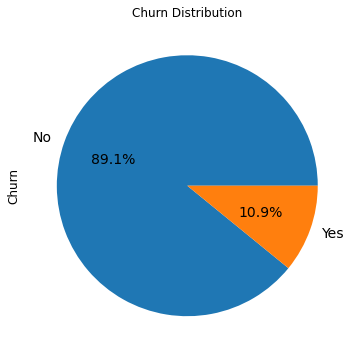

In [36]:
#Churn Distribution
pie_chart = high_value_customers['isChurn'].value_counts()*100.0 /len(high_value_customers)
ax = pie_chart.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(8,6), fontsize = 14 )                                                                           
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)
plt.show()

### Inference: 
       There is class imbalance. Only 10% churners and 90% non churners

### Continuing with missing value analysis and EDA

In [37]:
## Analysing the object columns
object_columns=high_value_customers.select_dtypes(include=['object']).columns
object_columns

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [38]:
## converting to date and time format
for c in object_columns:
    high_value_customers[c] = pd.to_datetime(high_value_customers[c])
    
high_value_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 7000842753 to 7000498689
Columns: 161 entries, arpu_6 to isChurn
dtypes: datetime64[ns](6), float64(128), int32(1), int64(26)
memory usage: 37.0 MB


#### Inference:
       - All fields have been converted to numbers/time. Objects have to been handled

In [39]:
### Univariate Analysis

In [40]:
pd.options.display.max_rows=250
null_df=(round(100*(high_value_customers.isnull().sum()/len(high_value_customers.index)), 2))
null_df

arpu_6                             0.00
arpu_7                             0.00
arpu_8                             0.00
onnet_mou_6                        1.82
onnet_mou_7                        1.79
onnet_mou_8                        3.91
offnet_mou_6                       1.82
offnet_mou_7                       1.79
offnet_mou_8                       3.91
roam_ic_mou_6                      1.82
roam_ic_mou_7                      1.79
roam_ic_mou_8                      3.91
roam_og_mou_6                      1.82
roam_og_mou_7                      1.79
roam_og_mou_8                      3.91
loc_og_t2t_mou_6                   1.82
loc_og_t2t_mou_7                   1.79
loc_og_t2t_mou_8                   3.91
loc_og_t2m_mou_6                   1.82
loc_og_t2m_mou_7                   1.79
loc_og_t2m_mou_8                   3.91
loc_og_t2f_mou_6                   1.82
loc_og_t2f_mou_7                   1.79
loc_og_t2f_mou_8                   3.91
loc_og_t2c_mou_6                   1.82


In [41]:
columns_40_null=null_df[null_df>40].index
columns_40_null

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8'],
      dtype='object')

In [42]:
high_value_customers[columns_40_null].describe()

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8
count,16756.000000,17057.000000,15953.000000,16756.000000,17057.000000,15953.000000,16756.000000,17057.000000,15953.000000,16756.000000,17057.000000,15953.000000,16756.000000,17057.000000,15953.000000,16756.000000,17057.000000,15953.000000
mean,2.221175,2.457642,2.272676,0.764801,0.802955,0.777471,119.974696,120.695809,118.050972,113.585859,113.801227,109.817427,0.024290,0.021985,0.021375,0.926534,0.921733,0.897198
std,3.005300,3.235315,3.112685,1.477739,1.617808,1.667737,226.092738,229.575385,218.941369,201.792701,206.066861,195.348610,0.153952,0.146639,0.144636,0.260908,0.268599,0.303710
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-30.280000,-26.040000,-24.490000,-15.320000,-15.480000,-24.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,15.480000,12.950000,10.020000,26.915000,24.000000,19.900000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,177.787500,180.040000,179.490000,168.517500,166.910000,157.190000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,42.000000,48.000000,44.000000,29.000000,35.000000,45.000000,6362.280000,4980.900000,3716.900000,6433.760000,4809.360000,3467.170000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
## dropping columns with more than 40% NaN values
high_value_customers= high_value_customers.drop(columns_40_null, axis=1)
high_value_customers

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt_data_good_phase,total_rech_amt_good_phase,total_avg_rech_amnt_good_phase,isChurn
mobile_number,,,,,,,,,,,,,,,,,,,,,
7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,...,0,0,968,30.40,0.00,101.20,504.0,614,559.0,1
7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0,0,802,57.74,19.38,18.74,0.0,2370,1185.0,1
7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0,0,315,21.03,910.65,122.16,354.0,1038,696.0,0
7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,0,0,720,0.00,0.00,0.00,0.0,1280,640.0,0
7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,0,1,604,40.45,51.86,0.00,712.0,454,583.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000630859,384.316,255.405,393.474,78.68,29.04,103.24,56.13,28.09,61.44,0.00,...,0,0,473,1100.43,619.59,668.05,504.0,624,564.0,0
7000661676,328.594,202.966,118.707,423.99,181.83,5.71,39.51,39.81,18.26,0.00,...,0,0,820,0.00,0.00,0.00,638.0,599,618.5,0
7001729035,644.973,455.228,564.334,806.73,549.36,775.41,784.76,617.13,595.44,0.00,...,0,0,2696,497.45,598.67,604.08,31.0,1697,864.0,0


In [44]:
pd.options.display.max_rows=250
null_df=(round(100*(high_value_customers.isnull().sum()/len(high_value_customers.index)), 2))
null_df

arpu_6                            0.00
arpu_7                            0.00
arpu_8                            0.00
onnet_mou_6                       1.82
onnet_mou_7                       1.79
onnet_mou_8                       3.91
offnet_mou_6                      1.82
offnet_mou_7                      1.79
offnet_mou_8                      3.91
roam_ic_mou_6                     1.82
roam_ic_mou_7                     1.79
roam_ic_mou_8                     3.91
roam_og_mou_6                     1.82
roam_og_mou_7                     1.79
roam_og_mou_8                     3.91
loc_og_t2t_mou_6                  1.82
loc_og_t2t_mou_7                  1.79
loc_og_t2t_mou_8                  3.91
loc_og_t2m_mou_6                  1.82
loc_og_t2m_mou_7                  1.79
loc_og_t2m_mou_8                  3.91
loc_og_t2f_mou_6                  1.82
loc_og_t2f_mou_7                  1.79
loc_og_t2f_mou_8                  3.91
loc_og_t2c_mou_6                  1.82
loc_og_t2c_mou_7         

#### Inference:
         - remaining columns with less than 4% of NaN values, replacing it with 0

In [45]:
nan_column_4=null_df[null_df<4].index
nan_column_4

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6',
       'total_rech_amt_data_good_phase', 'total_rech_amt_good_phase',
       'total_avg_rech_amnt_good_phase', 'isChurn'],
      dtype='object', length=140)

In [46]:
#replacing with 0
high_value_customers[nan_column_4]=high_value_customers[nan_column_4].fillna(0)


In [47]:
pd.options.display.max_rows=250
null_df=(round(100*(high_value_customers.isnull().sum()/len(high_value_customers.index)), 2))
null_df

arpu_6                            0.0
arpu_7                            0.0
arpu_8                            0.0
onnet_mou_6                       0.0
onnet_mou_7                       0.0
onnet_mou_8                       0.0
offnet_mou_6                      0.0
offnet_mou_7                      0.0
offnet_mou_8                      0.0
roam_ic_mou_6                     0.0
roam_ic_mou_7                     0.0
roam_ic_mou_8                     0.0
roam_og_mou_6                     0.0
roam_og_mou_7                     0.0
roam_og_mou_8                     0.0
loc_og_t2t_mou_6                  0.0
loc_og_t2t_mou_7                  0.0
loc_og_t2t_mou_8                  0.0
loc_og_t2m_mou_6                  0.0
loc_og_t2m_mou_7                  0.0
loc_og_t2m_mou_8                  0.0
loc_og_t2f_mou_6                  0.0
loc_og_t2f_mou_7                  0.0
loc_og_t2f_mou_8                  0.0
loc_og_t2c_mou_6                  0.0
loc_og_t2c_mou_7                  0.0
loc_og_t2c_m

#### Inference:
      - All null values have been handled

In [48]:
## Analysing "total_rech_amt"
high_value_customers[["total_rech_amt_6","total_rech_amt_7", "total_rech_amt_8"]].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8
count,30001.000000,30001.000000,30001.000000
mean,660.732342,660.498017,584.365454
std,561.032865,582.430876,611.245907
min,0.000000,0.000000,0.000000
25%,360.000000,352.000000,250.000000
50%,566.000000,562.000000,490.000000
75%,834.000000,831.000000,776.000000
max,35190.000000,40335.000000,45320.000000


<AxesSubplot:>

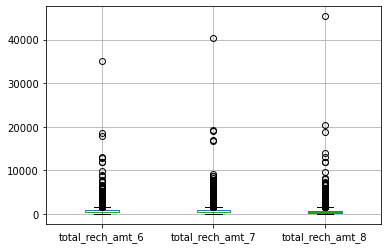

In [49]:
high_value_customers[["total_rech_amt_6","total_rech_amt_7", "total_rech_amt_8"]].boxplot()

In [50]:
print(high_value_customers["total_rech_amt_6"].quantile(.99))
print(high_value_customers["total_rech_amt_7"].quantile(.99))
print(high_value_customers["total_rech_amt_8"].quantile(.99))

2376.0
2427.0
2341.0


#### Inference: 
       - There are outliers. Replacing with 99th percentile value

In [51]:
high_value_customers["total_rech_amt_6"].loc[(high_value_customers["total_rech_amt_6"] > 2376.0)] = 2376.0
high_value_customers["total_rech_amt_7"].loc[(high_value_customers["total_rech_amt_7"] > 2427.0)] = 2427.0
high_value_customers["total_rech_amt_8"].loc[(high_value_customers["total_rech_amt_8"] > 2341.0)] = 2341.0


<AxesSubplot:>

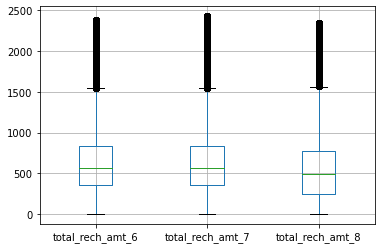

In [52]:
high_value_customers[["total_rech_amt_6","total_rech_amt_7", "total_rech_amt_8"]].boxplot()

#### Bi variate analysis
          - Analysing columns with churn rate

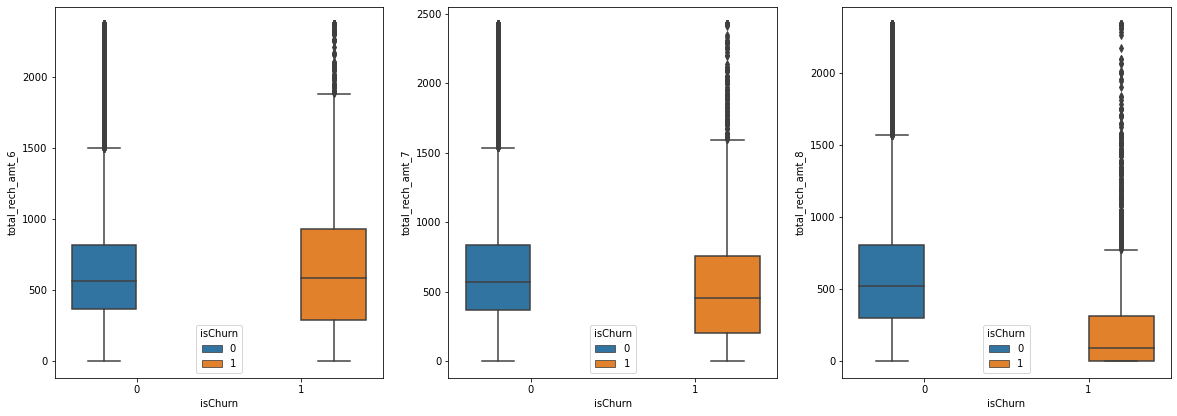

In [53]:
## Analysing total_rech_amt amount columns
## _6 and _7 have been grouped as good phase
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
sns.boxplot(data=high_value_customers, y="total_rech_amt_6", x="isChurn",hue="isChurn")
plt.subplot(2,3,2)
sns.boxplot(data=high_value_customers, y="total_rech_amt_7",x="isChurn",hue="isChurn")
plt.subplot(2,3,3)
sns.boxplot(data=high_value_customers, y="total_rech_amt_8",x="isChurn",hue="isChurn")
plt.show()

#### Infernce:
          - As we can see, there is a descrease in the recharge amount in the action phase(i.e., 8th month) for churned customers

<AxesSubplot:>

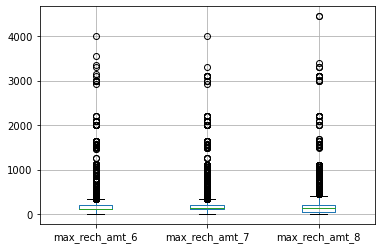

In [54]:
### Analysing max_rech_amt with churn rate
high_value_customers[["max_rech_amt_6","max_rech_amt_7", "max_rech_amt_8"]].boxplot()

In [55]:
print(high_value_customers["max_rech_amt_6"].quantile(.95))
print(high_value_customers["max_rech_amt_7"].quantile(.95))
print(high_value_customers["max_rech_amt_8"].quantile(.95))

459.0
459.0
440.0


In [56]:
high_value_customers["max_rech_amt_6"].loc[(high_value_customers["max_rech_amt_6"] > 459.0)] = 459.0
high_value_customers["max_rech_amt_7"].loc[(high_value_customers["max_rech_amt_7"] > 459.0)] = 459.0
high_value_customers["max_rech_amt_8"].loc[(high_value_customers["max_rech_amt_8"] > 440.0)] = 440.0

#### Inference: 
       - There are outliers. Replacing with 99th percentile value

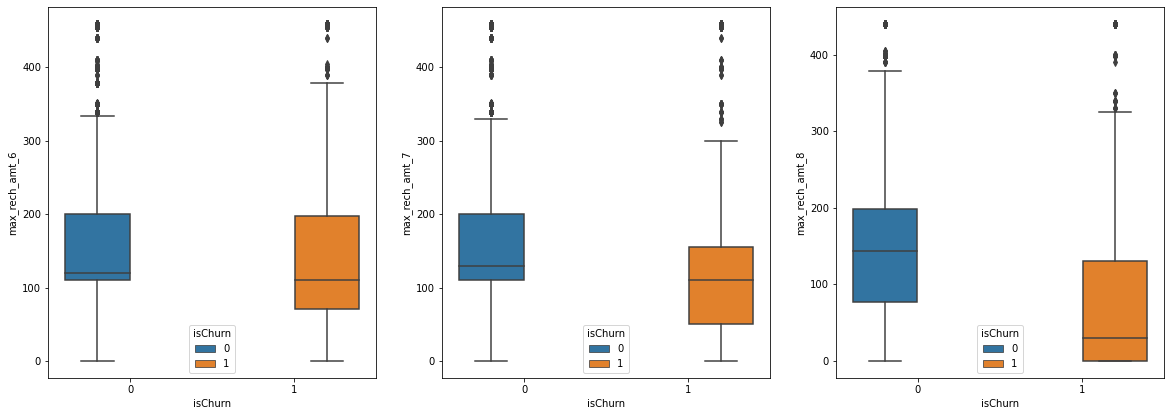

In [57]:
### Analysing max_rech_amt with churn rate
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
sns.boxplot(data=high_value_customers, y="max_rech_amt_6", x="isChurn",hue="isChurn")
plt.subplot(2,3,2)
sns.boxplot(data=high_value_customers, y="max_rech_amt_7",x="isChurn",hue="isChurn")
plt.subplot(2,3,3)
sns.boxplot(data=high_value_customers, y="max_rech_amt_8",x="isChurn",hue="isChurn")
plt.show()

#### Inference:
          - There is a descrease in the max recharge number in the action phase(i.e., 8th month) for churned customers

<AxesSubplot:>

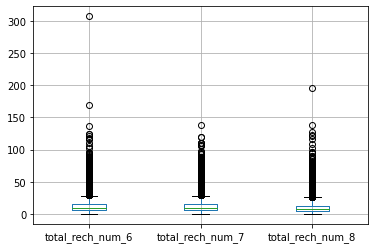

In [58]:
##Analysisng total_rech_num
high_value_customers[["total_rech_num_6","total_rech_num_7", "total_rech_num_8"]].boxplot()

In [59]:
print(high_value_customers["total_rech_num_6"].quantile(.95))
print(high_value_customers["total_rech_num_7"].quantile(.95))
print(high_value_customers["total_rech_num_8"].quantile(.95))

29.0
29.0
28.0


In [60]:
high_value_customers["total_rech_num_6"].loc[(high_value_customers["total_rech_num_6"] > 29.0)] = 29.0
high_value_customers["total_rech_num_7"].loc[(high_value_customers["total_rech_num_7"] > 29.0)] = 29.0
high_value_customers["total_rech_num_8"].loc[(high_value_customers["total_rech_num_8"] > 28.0)] = 28.0

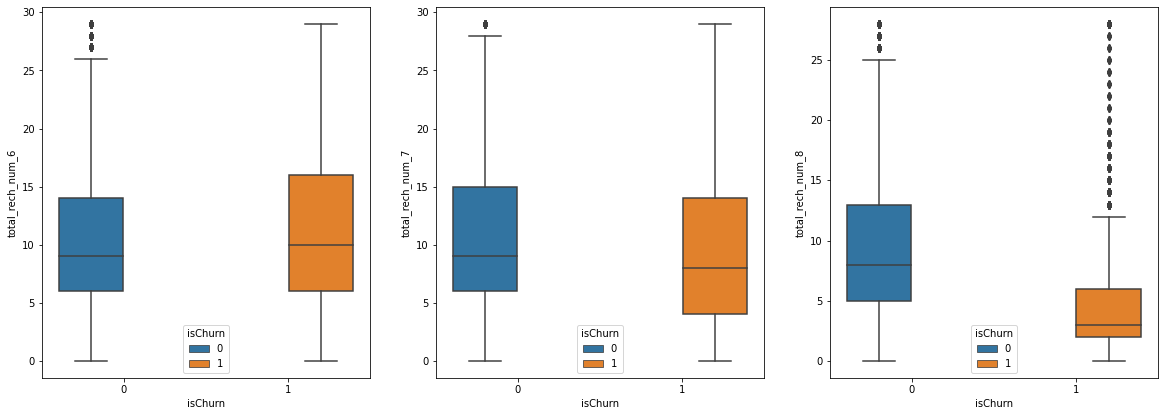

In [61]:
### Analysing total_rech_num with churn rate
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
sns.boxplot(data=high_value_customers, y="total_rech_num_6", x="isChurn",hue="isChurn")
plt.subplot(2,3,2)
sns.boxplot(data=high_value_customers, y="total_rech_num_7",x="isChurn",hue="isChurn")
plt.subplot(2,3,3)
sns.boxplot(data=high_value_customers, y="total_rech_num_8",x="isChurn",hue="isChurn")
plt.show()

#### Inference:
          - There is a descrease in the total recharge number in the action phase(i.e., 8th month) for churned customers

<AxesSubplot:>

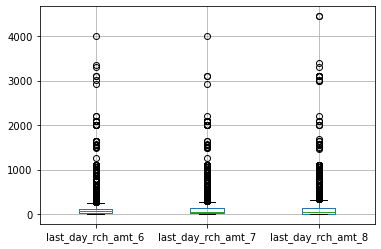

In [62]:
### Analysing last_day_rch_amt
high_value_customers[["last_day_rch_amt_6","last_day_rch_amt_7", "last_day_rch_amt_8"]].boxplot()

In [63]:
print(high_value_customers["last_day_rch_amt_6"].quantile(.95))
print(high_value_customers["last_day_rch_amt_7"].quantile(.95))
print(high_value_customers["last_day_rch_amt_8"].quantile(.95))

252.0
252.0
252.0


In [64]:
high_value_customers["last_day_rch_amt_6"].loc[(high_value_customers["last_day_rch_amt_6"] > 252.0)] = 252.0
high_value_customers["last_day_rch_amt_7"].loc[(high_value_customers["last_day_rch_amt_7"] > 252.0)] = 252.0
high_value_customers["last_day_rch_amt_8"].loc[(high_value_customers["last_day_rch_amt_8"] > 252.0)] = 252.0

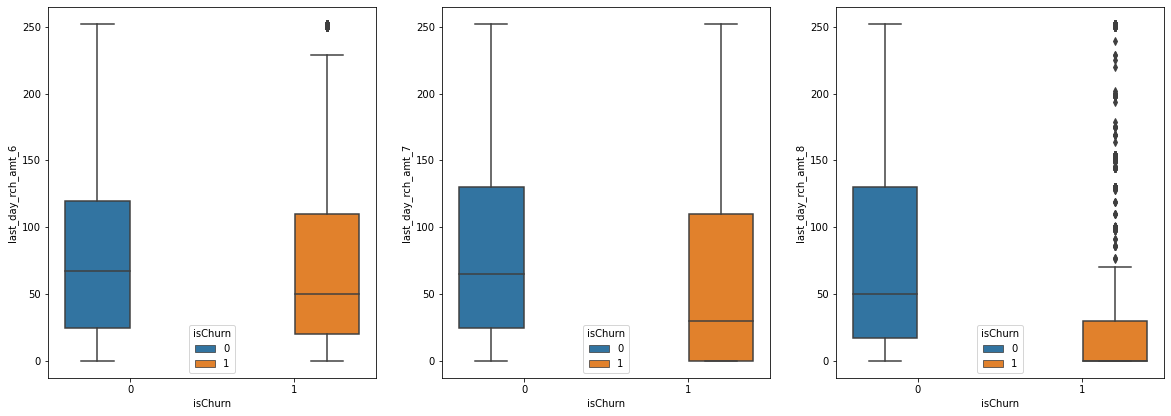

In [65]:
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
sns.boxplot(data=high_value_customers, y="last_day_rch_amt_6", x="isChurn",hue="isChurn")
plt.subplot(2,3,2)
sns.boxplot(data=high_value_customers, y="last_day_rch_amt_7",x="isChurn",hue="isChurn")
plt.subplot(2,3,3)
sns.boxplot(data=high_value_customers, y="last_day_rch_amt_8",x="isChurn",hue="isChurn")
plt.show()

#### Inference:
     - Again we see a dip in the amount when customers are being churned in action(8th) phase

<AxesSubplot:>

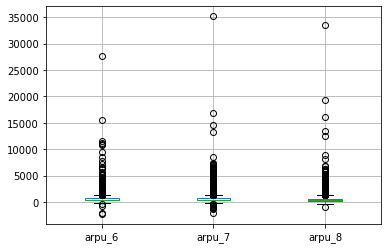

In [66]:
### Analysing arpu columns
high_value_customers[["arpu_6","arpu_7", "arpu_8"]].boxplot()


In [67]:
print(high_value_customers["arpu_6"].quantile(.95))
print(high_value_customers["arpu_7"].quantile(.95))
print(high_value_customers["arpu_8"].quantile(.95))

1240.964
1261.272
1255.019


In [68]:
high_value_customers["arpu_6"].loc[(high_value_customers["arpu_6"] > 1240.0)] = 1240.0
high_value_customers["arpu_7"].loc[(high_value_customers["arpu_7"] > 1261.0)] = 1261.0
high_value_customers["arpu_8"].loc[(high_value_customers["arpu_8"] > 1255.0)] = 1255.0

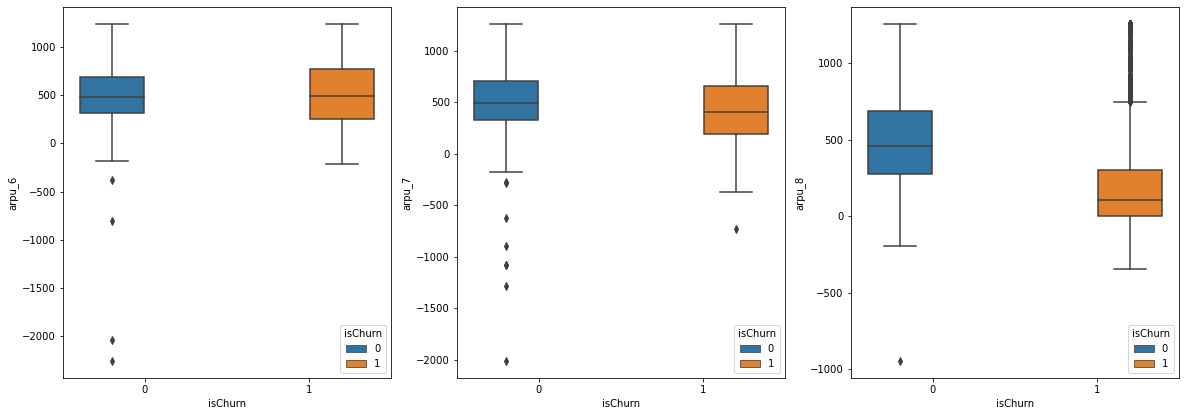

In [69]:
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
sns.boxplot(data=high_value_customers, y="arpu_6", x="isChurn",hue="isChurn")
plt.subplot(2,3,2)
sns.boxplot(data=high_value_customers, y="arpu_7",x="isChurn",hue="isChurn")
plt.subplot(2,3,3)
sns.boxplot(data=high_value_customers, y="arpu_8",x="isChurn",hue="isChurn")
plt.show()

#### Inference:
            - Again we see a dip in action phase for avg revenue per user where the users have churned

<AxesSubplot:>

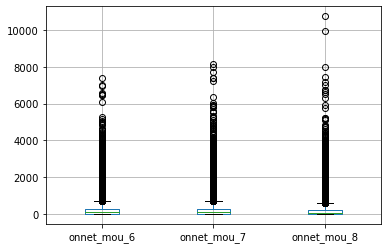

In [70]:
### Analysing onnet (Same Network) minutes of usage columns
high_value_customers[["onnet_mou_6","onnet_mou_7", "onnet_mou_8"]].boxplot()

In [71]:
print(high_value_customers["onnet_mou_6"].quantile(.95))
print(high_value_customers["onnet_mou_7"].quantile(.95))
print(high_value_customers["onnet_mou_8"].quantile(.95))

1135.44
1185.79
1074.59


In [72]:
high_value_customers["onnet_mou_6"].loc[(high_value_customers["onnet_mou_6"] > 1135.44)] = 1135.44
high_value_customers["onnet_mou_7"].loc[(high_value_customers["onnet_mou_7"] > 1185.79)] = 1185.79
high_value_customers["onnet_mou_8"].loc[(high_value_customers["onnet_mou_8"] > 1074.59)] = 1074.59

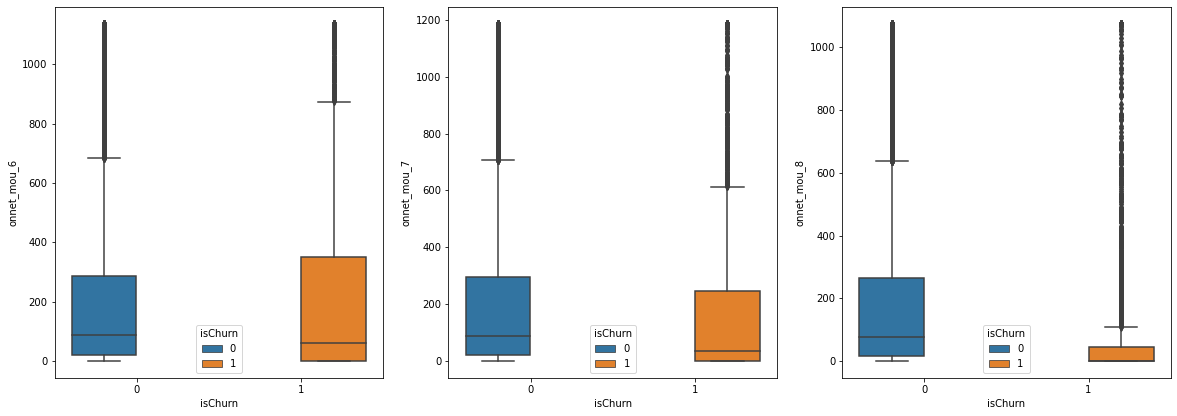

In [73]:
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
sns.boxplot(data=high_value_customers, y="onnet_mou_6", x="isChurn",hue="isChurn")
plt.subplot(2,3,2)
sns.boxplot(data=high_value_customers, y="onnet_mou_7",x="isChurn",hue="isChurn")
plt.subplot(2,3,3)
sns.boxplot(data=high_value_customers, y="onnet_mou_8",x="isChurn",hue="isChurn")
plt.show()

#### Inference:
            - Again we see a dip in action phase for onnet (Same Network) usage where the users have churned

<AxesSubplot:>

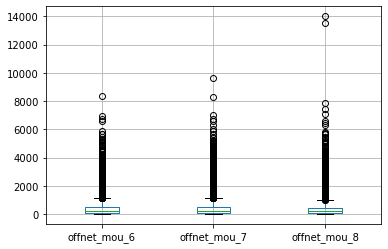

In [74]:
### Analysing offnet (Other Network) minutes of usage columns
high_value_customers[["offnet_mou_6","offnet_mou_7", "offnet_mou_8"]].boxplot()

In [75]:
print(high_value_customers["offnet_mou_6"].quantile(.95))
print(high_value_customers["offnet_mou_7"].quantile(.95))
print(high_value_customers["offnet_mou_8"].quantile(.95))

1256.61
1272.29
1167.54


In [76]:
high_value_customers["offnet_mou_6"].loc[(high_value_customers["offnet_mou_6"] > 1256.61)] = 1256.61
high_value_customers["offnet_mou_7"].loc[(high_value_customers["offnet_mou_7"] > 1272.29)] = 1272.29
high_value_customers["offnet_mou_8"].loc[(high_value_customers["offnet_mou_8"] > 1167.54)] = 1167.54

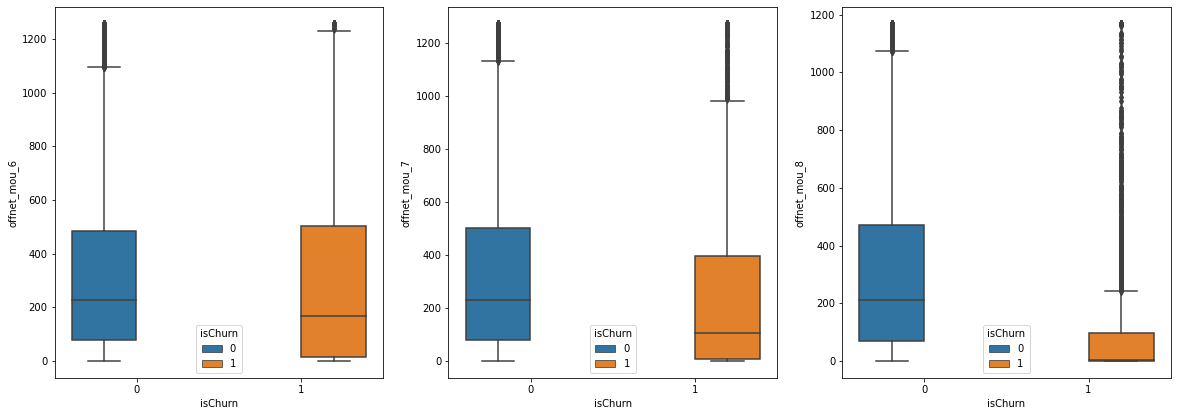

In [77]:
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
sns.boxplot(data=high_value_customers, y="offnet_mou_6", x="isChurn",hue="isChurn")
plt.subplot(2,3,2)
sns.boxplot(data=high_value_customers, y="offnet_mou_7",x="isChurn",hue="isChurn")
plt.subplot(2,3,3)
sns.boxplot(data=high_value_customers, y="offnet_mou_8",x="isChurn",hue="isChurn")
plt.show()

#### Inference:
            - Again we see a dip in action phase for offnet (Other Network) usage where the users have churned

### Multivariate analysis
 - Analysing columns of mou... there are a lot of columns with _mou

In [78]:
### Checking if there are duplicate identifiers for the 6th month and use the same observation for 7th and 8th month
mou_columns=high_value_customers.columns[high_value_customers.columns.str.contains("mou_6")]

In [79]:
mou_columns

Index(['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6',
       'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6',
       'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6',
       'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6',
       'spl_og_mou_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6',
       'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6',
       'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6',
       'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6'],
      dtype='object')

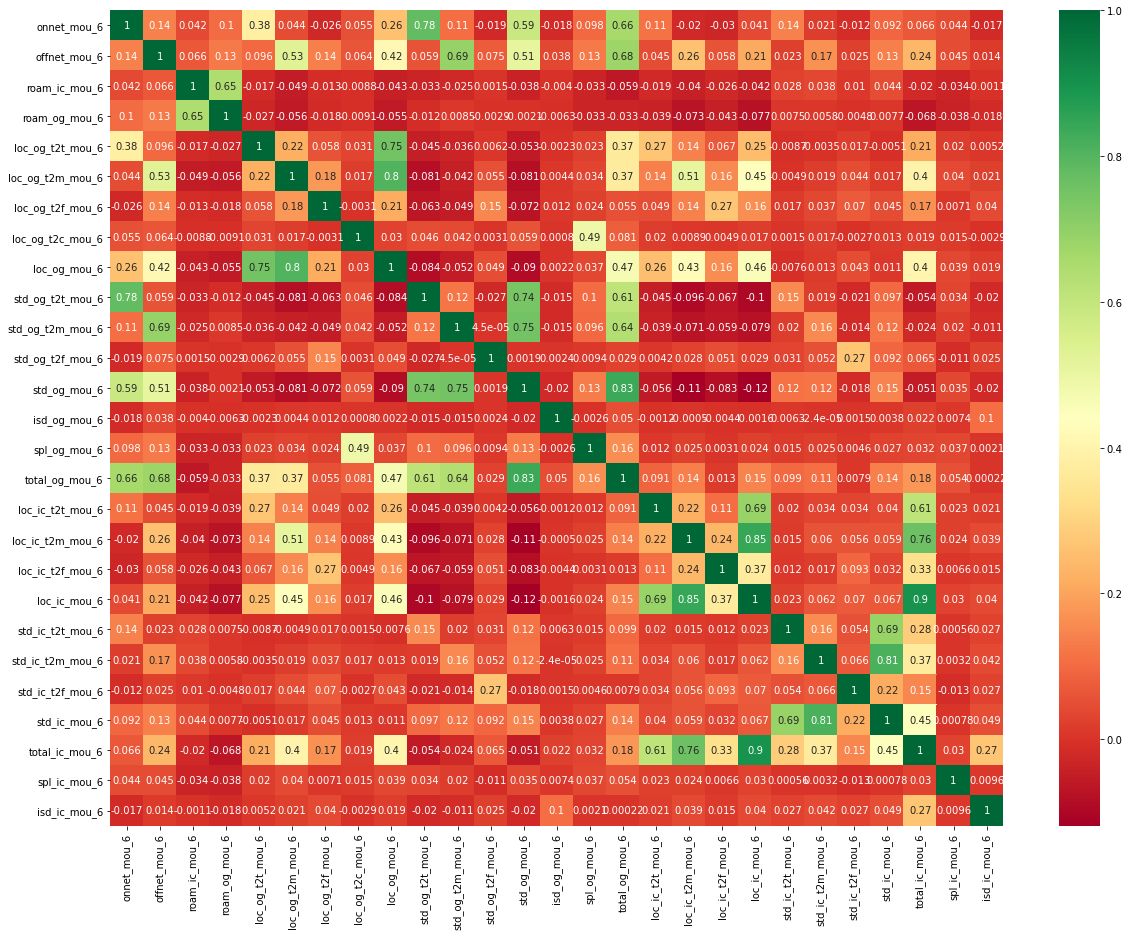

In [80]:
plt.figure(figsize=(20,15))
sns.heatmap(high_value_customers[mou_columns].corr(),cmap="RdYlGn",annot=True)
plt.show()

#### Inference:
      total_og_mou_6, std_og_mou_6, loc_og_mou_6, total_ic_mou_6, std_ic_mou_6, loc_ic_mou_6 these columns seem to have high correlation with other variables
    hence dropping the same columns along with other months 7 and 8. 

In [81]:
cols_dup=['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','std_og_mou_6','std_og_mou_7','std_og_mou_8','total_og_mou_6','total_og_mou_7','total_og_mou_8', 'loc_ic_mou_6','loc_ic_mou_7', 'loc_ic_mou_8','std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
high_value_customers= high_value_customers.drop(cols_dup, axis=1)
high_value_customers

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt_data_good_phase,total_rech_amt_good_phase,total_avg_rech_amnt_good_phase,isChurn
mobile_number,,,,,,,,,,,,,,,,,,,,,
7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,968,30.40,0.00,101.20,504.0,614,559.0,1
7000701601,1069.180,1261.000,1255.000,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0,0,802,57.74,19.38,18.74,0.0,2370,1185.0,1
7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0,0,315,21.03,910.65,122.16,354.0,1038,696.0,0
7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,0,0,720,0.00,0.00,0.00,0.0,1280,640.0,0
7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,0,1,604,40.45,51.86,0.00,712.0,454,583.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000630859,384.316,255.405,393.474,78.68,29.04,103.24,56.13,28.09,61.44,0.00,...,0,0,473,1100.43,619.59,668.05,504.0,624,564.0,0
7000661676,328.594,202.966,118.707,423.99,181.83,5.71,39.51,39.81,18.26,0.00,...,0,0,820,0.00,0.00,0.00,638.0,599,618.5,0
7001729035,644.973,455.228,564.334,806.73,549.36,775.41,784.76,617.13,595.44,0.00,...,0,0,2696,497.45,598.67,604.08,31.0,1697,864.0,0


In [82]:
### checking heatmap correlatio. again
mou_columns=high_value_customers.columns[high_value_customers.columns.str.contains("mou_6")]

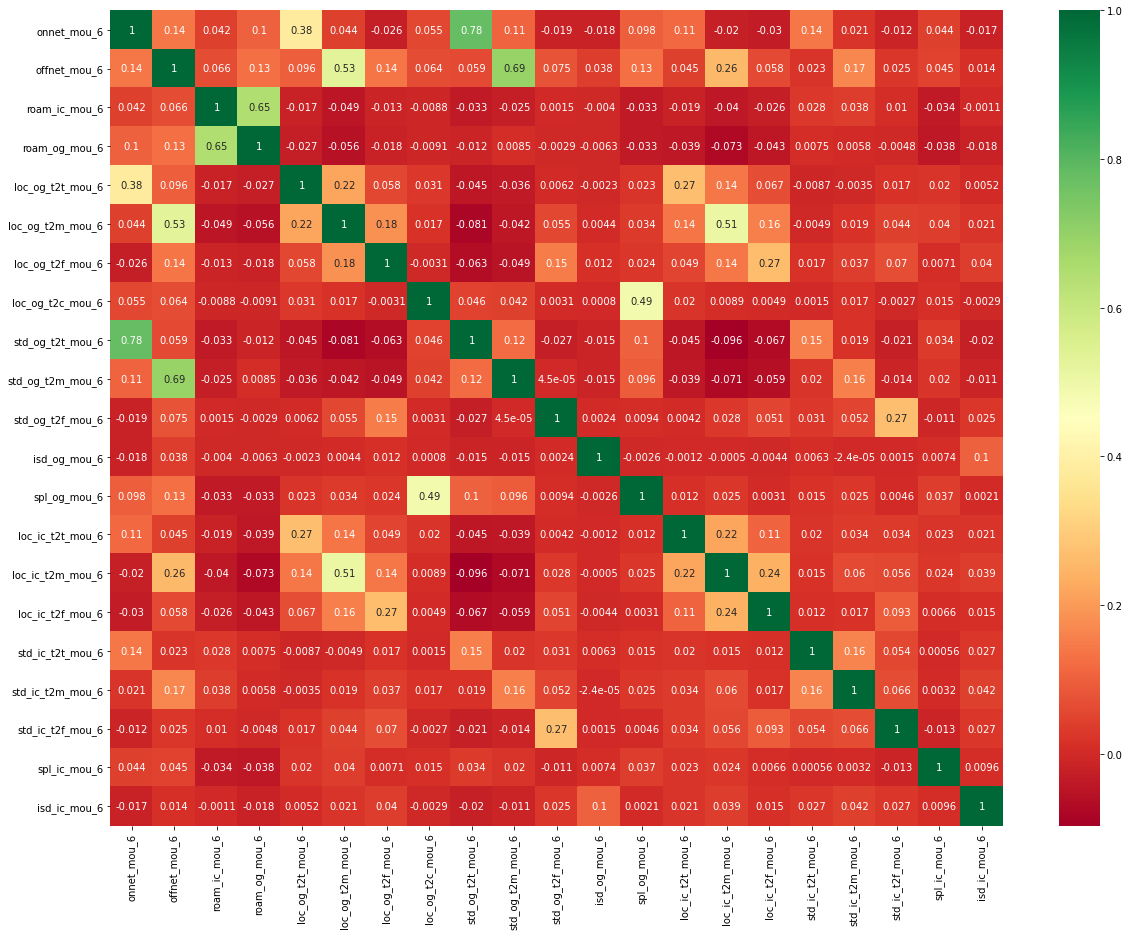

In [83]:
plt.figure(figsize=(20,15))
sns.heatmap(high_value_customers[mou_columns].corr(),cmap="RdYlGn",annot=True)
plt.show()

### Deriving some more new features to reduce no of columns
          - Combining(averageing) all _6 and _7 and renaming as good phase. Leaving all _8 to be considered as action phase

In [84]:
# dropping columns which may not needed for analysis
high_value_customers.drop(["total_avg_rech_amnt_good_phase"],axis=1,inplace=True)
high_value_customers.drop(high_value_customers.filter(regex='date_').columns,axis=1,inplace=True)

In [85]:
## take column names for which we have to take average
cols= high_value_customers.columns[high_value_customers.columns.str.contains("_6")]
cols

Index(['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
       'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'std_og_t2t_mou_6',
       'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'isd_og_mou_6', 'spl_og_mou_6',
       'og_others_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6',
       'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6',
       'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6',
       'last_day_rch_amt_6', 'total_rech_data_6', 'max_rech_data_6',
       'av_rech_amt_data_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'monthly_2g_6',
       'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6', 'vbc_3g_6'],
      dtype='object')

In [86]:
### Claculate average
for col in cols:
    col_name=col[:-2]
    avg_col_name = "avg_"+col_name+"_good_phase"
    high_value_customers[avg_col_name] = (high_value_customers[col_name+"_6"]  + high_value_customers[col_name+"_7"])/ 2

In [87]:
high_value_customers

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,avg_total_rech_data_good_phase,avg_max_rech_data_good_phase,avg_av_rech_amt_data_good_phase,avg_vol_2g_mb_good_phase,avg_vol_3g_mb_good_phase,avg_monthly_2g_good_phase,avg_sachet_2g_good_phase,avg_monthly_3g_good_phase,avg_sachet_3g_good_phase,avg_vbc_3g_good_phase
mobile_number,,,,,,,,,,,,,,,,,,,,,
7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.0,252.0,252.0,15.725,117.165,0.0,0.0,1.0,0.0,50.600
7000701601,1069.180,1261.000,1255.000,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,19.060
7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,1.0,77.0,88.5,178.000,375.475,0.5,0.5,0.0,0.0,516.405
7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000
7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,1.0,89.5,178.0,0.240,299.545,0.0,0.0,1.0,0.0,25.930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000630859,384.316,255.405,393.474,78.68,29.04,103.24,56.13,28.09,61.44,0.00,...,1.0,252.0,252.0,77.915,644.815,0.0,0.0,1.0,0.0,643.820
7000661676,328.594,202.966,118.707,423.99,181.83,5.71,39.51,39.81,18.26,0.00,...,2.5,100.0,137.5,986.775,0.000,0.5,2.0,0.0,0.0,0.000
7001729035,644.973,455.228,564.334,806.73,549.36,775.41,784.76,617.13,595.44,0.00,...,1.0,15.5,15.5,25.345,932.675,0.0,1.0,0.0,0.0,601.375


In [88]:
### drop columns with _6 and _7 as we have good_phase columns
cols= high_value_customers.columns[(high_value_customers.columns.str.contains("_6") )| (high_value_customers.columns.str.contains("_7") )]
cols


Index(['arpu_6', 'arpu_7', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6',
       'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6',
       'roam_og_mou_7', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6', 'spl_og_mou_7',
       'og_others_6', 'og_others_7', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_6',
       'std_ic_t2f_mou_7', 'spl_ic_mou_6', 'spl_ic_mou_7', 'isd_ic_mou_6',
       'isd_ic_mou_7', 'ic_others_6', 'ic_others_7', 'total_rech_num_6',
       'total_rech_num_7

In [89]:
high_value_customers.drop(cols,axis=1,inplace=True)
print (high_value_customers.shape)

(30001, 80)


In [90]:
high_value_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 7000842753 to 7000498689
Data columns (total 80 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   arpu_8                           30001 non-null  float64
 1   onnet_mou_8                      30001 non-null  float64
 2   offnet_mou_8                     30001 non-null  float64
 3   roam_ic_mou_8                    30001 non-null  float64
 4   roam_og_mou_8                    30001 non-null  float64
 5   loc_og_t2t_mou_8                 30001 non-null  float64
 6   loc_og_t2m_mou_8                 30001 non-null  float64
 7   loc_og_t2f_mou_8                 30001 non-null  float64
 8   loc_og_t2c_mou_8                 30001 non-null  float64
 9   std_og_t2t_mou_8                 30001 non-null  float64
 10  std_og_t2m_mou_8                 30001 non-null  float64
 11  std_og_t2f_mou_8                 30001 non-null  float64
 12  isd_

#### Inference:
         - The columns have been reduced using derived columns for good phase

## Deriving New Variables / Buckets  on high value customers for Inferences /EDA

In [91]:
hvcust_EDA=high_value_customers[['aon','arpu_8','total_rech_amt_8','avg_arpu_good_phase','avg_total_rech_amt_good_phase',
                                             'onnet_mou_8','offnet_mou_8','avg_onnet_mou_good_phase','avg_offnet_mou_good_phase','isChurn']]
hvcust_EDA.aon=round(hvcust_EDA.aon/365,1)
hvcust_EDA.onnet_mou_8=round(hvcust_EDA.onnet_mou_8/24,2)
hvcust_EDA.offnet_mou_8=round(hvcust_EDA.offnet_mou_8/24,2)
hvcust_EDA.avg_onnet_mou_good_phase=round(hvcust_EDA.avg_onnet_mou_good_phase/24,2)
hvcust_EDA.avg_offnet_mou_good_phase=round(hvcust_EDA.avg_offnet_mou_good_phase/24,2)
hvcust_EDA.rename(columns={'aon':'age_years','arpu_8':'arpu_actionphase','total_rech_amt_8':'tot_rech_amt_actionphase',
                          'avg_total_rech_amt_good_phase':'tot_rech_amt_goodphase','avg_arpu_good_phase':'arpu_goodphase',
                          'onnet_mou_8':'onnet_hrs_actionphase','offnet_mou_8':'offnet_hrs_actionphase',
                          'avg_onnet_mou_good_phase':'onnet_hrs_goodphase','avg_offnet_mou_good_phase':'offnet_hrs_goodphase'},inplace=True)

In [92]:
hvcust_EDA.describe()

,age_years,arpu_actionphase,tot_rech_amt_actionphase,arpu_goodphase,tot_rech_amt_goodphase,onnet_hrs_actionphase,offnet_hrs_actionphase,onnet_hrs_goodphase,offnet_hrs_goodphase,isChurn
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,3.313053,480.241570,571.447185,531.962531,648.407470,8.276798,12.519744,9.612469,14.230695,0.108863
std,2.623980,331.407412,460.132574,272.199349,380.333405,12.241951,13.642856,12.789900,13.780789,0.311472
min,0.500000,-945.808000,0.000000,-749.783000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.300000,231.473000,250.000000,345.143000,409.000000,0.430000,1.950000,0.860000,3.460000,0.000000
50%,2.300000,427.585000,490.000000,484.855000,568.500000,2.730000,7.620000,3.830000,9.820000,0.000000
75%,4.800000,661.491000,776.000000,671.554000,795.500000,10.000000,18.290000,12.810000,20.750000,0.000000
max,11.800000,1255.000000,2341.000000,1250.500000,2401.500000,44.770000,48.650000,48.360000,52.690000,1.000000


In [93]:
#Creating buckets for Ageinnetwork
bins= [0,2,5,12]
labels = ['0-2 years','2-5 years','5-12']
hvcust_EDA['Ageinnetwork'] = pd.cut(hvcust_EDA['age_years'], bins=bins, labels=labels, right=False)
hvcust_EDA.drop(['age_years'],axis=1,inplace=True)
hvcust_EDA.head()

,arpu_actionphase,tot_rech_amt_actionphase,arpu_goodphase,tot_rech_amt_goodphase,onnet_hrs_actionphase,offnet_hrs_actionphase,onnet_hrs_goodphase,offnet_hrs_goodphase,isChurn,Ageinnetwork
mobile_number,,,,,,,,,,
7000842753,213.803,252,206.1005,307.0,0.00,0.00,0.00,0.00,1,2-5 years
7000701601,1255.000,2341,1165.0900,1185.0,2.18,13.58,2.34,21.26,1,2-5 years
7001524846,137.362,120,435.4720,519.0,1.46,5.69,15.93,3.65,0,0-2 years
7002124215,637.760,718,556.1030,640.0,3.55,40.97,4.89,34.47,0,2-5 years
7000887461,366.966,439,134.1235,227.0,1.40,8.58,2.08,3.64,0,0-2 years


In [94]:
#Creating buckets for arpu
bins= [-1000,0,0.5,500,1000,1500]
labels = ['Negative Revenue','ZeroRevenue','LowRevenue','MediumRevenue','HighRevenue']
hvcust_EDA['Rev_ActionPhase'] = pd.cut(hvcust_EDA['arpu_actionphase'], bins=bins, labels=labels, right=False)
hvcust_EDA['Rev_GoodPhase'] = pd.cut(hvcust_EDA['arpu_goodphase'], bins=bins, labels=labels, right=False)
hvcust_EDA.drop(['arpu_actionphase','arpu_goodphase'],axis=1,inplace=True)
hvcust_EDA.head()

,tot_rech_amt_actionphase,tot_rech_amt_goodphase,onnet_hrs_actionphase,offnet_hrs_actionphase,onnet_hrs_goodphase,offnet_hrs_goodphase,isChurn,Ageinnetwork,Rev_ActionPhase,Rev_GoodPhase
mobile_number,,,,,,,,,,
7000842753,252,307.0,0.00,0.00,0.00,0.00,1,2-5 years,LowRevenue,LowRevenue
7000701601,2341,1185.0,2.18,13.58,2.34,21.26,1,2-5 years,HighRevenue,HighRevenue
7001524846,120,519.0,1.46,5.69,15.93,3.65,0,0-2 years,LowRevenue,LowRevenue
7002124215,718,640.0,3.55,40.97,4.89,34.47,0,2-5 years,MediumRevenue,MediumRevenue
7000887461,439,227.0,1.40,8.58,2.08,3.64,0,0-2 years,LowRevenue,LowRevenue


In [95]:
#Creating buckets for total rech amount
bins= [0,1,500,1000,2000,2500]
labels = ['0 Amt','1-500 amt','500-1000 amt','1000-2000 amt','2000-2500 amt']
hvcust_EDA['Rech_ActionPhase'] = pd.cut(hvcust_EDA['tot_rech_amt_actionphase'], bins=bins, labels=labels, right=False)
hvcust_EDA['Rech_GoodPhase'] = pd.cut(hvcust_EDA['tot_rech_amt_goodphase'], bins=bins, labels=labels, right=False)
hvcust_EDA.drop(['tot_rech_amt_actionphase','tot_rech_amt_goodphase'],axis=1,inplace=True)
hvcust_EDA.head()

,onnet_hrs_actionphase,offnet_hrs_actionphase,onnet_hrs_goodphase,offnet_hrs_goodphase,isChurn,Ageinnetwork,Rev_ActionPhase,Rev_GoodPhase,Rech_ActionPhase,Rech_GoodPhase
mobile_number,,,,,,,,,,
7000842753,0.00,0.00,0.00,0.00,1,2-5 years,LowRevenue,LowRevenue,1-500 amt,1-500 amt
7000701601,2.18,13.58,2.34,21.26,1,2-5 years,HighRevenue,HighRevenue,2000-2500 amt,1000-2000 amt
7001524846,1.46,5.69,15.93,3.65,0,0-2 years,LowRevenue,LowRevenue,1-500 amt,500-1000 amt
7002124215,3.55,40.97,4.89,34.47,0,2-5 years,MediumRevenue,MediumRevenue,500-1000 amt,500-1000 amt
7000887461,1.40,8.58,2.08,3.64,0,0-2 years,LowRevenue,LowRevenue,1-500 amt,1-500 amt


In [96]:
#Creating buckets for onnet same network hrs
bins= [0,1,20,40,60]
labels = ['No/Negligible Usage','Less Usage','Normal Usage','Higher usage']
hvcust_EDA['onnet_ActionPhase'] = pd.cut(hvcust_EDA['onnet_hrs_actionphase'], bins=bins, labels=labels, right=False)
hvcust_EDA['onnet_GoodPhase'] = pd.cut(hvcust_EDA['onnet_hrs_goodphase'], bins=bins, labels=labels, right=False)
hvcust_EDA['offnet_ActionPhase'] = pd.cut(hvcust_EDA['offnet_hrs_actionphase'], bins=bins, labels=labels, right=False)
hvcust_EDA['offnet_GoodPhase'] = pd.cut(hvcust_EDA['offnet_hrs_goodphase'], bins=bins, labels=labels, right=False)
hvcust_EDA.drop(['onnet_hrs_actionphase','onnet_hrs_goodphase','offnet_hrs_actionphase','offnet_hrs_goodphase'],axis=1,inplace=True)
hvcust_EDA.head()

,isChurn,Ageinnetwork,Rev_ActionPhase,Rev_GoodPhase,Rech_ActionPhase,Rech_GoodPhase,onnet_ActionPhase,onnet_GoodPhase,offnet_ActionPhase,offnet_GoodPhase
mobile_number,,,,,,,,,,
7000842753,1,2-5 years,LowRevenue,LowRevenue,1-500 amt,1-500 amt,No/Negligible Usage,No/Negligible Usage,No/Negligible Usage,No/Negligible Usage
7000701601,1,2-5 years,HighRevenue,HighRevenue,2000-2500 amt,1000-2000 amt,Less Usage,Less Usage,Less Usage,Normal Usage
7001524846,0,0-2 years,LowRevenue,LowRevenue,1-500 amt,500-1000 amt,Less Usage,Less Usage,Less Usage,Less Usage
7002124215,0,2-5 years,MediumRevenue,MediumRevenue,500-1000 amt,500-1000 amt,Less Usage,Less Usage,Higher usage,Normal Usage
7000887461,0,0-2 years,LowRevenue,LowRevenue,1-500 amt,1-500 amt,Less Usage,Less Usage,Less Usage,Less Usage


In [97]:
hvcust_EDA.reset_index(inplace=True)
hvcust_EDA.head()

,mobile_number,isChurn,Ageinnetwork,Rev_ActionPhase,Rev_GoodPhase,Rech_ActionPhase,Rech_GoodPhase,onnet_ActionPhase,onnet_GoodPhase,offnet_ActionPhase,offnet_GoodPhase
0,7000842753,1,2-5 years,LowRevenue,LowRevenue,1-500 amt,1-500 amt,No/Negligible Usage,No/Negligible Usage,No/Negligible Usage,No/Negligible Usage
1,7000701601,1,2-5 years,HighRevenue,HighRevenue,2000-2500 amt,1000-2000 amt,Less Usage,Less Usage,Less Usage,Normal Usage
2,7001524846,0,0-2 years,LowRevenue,LowRevenue,1-500 amt,500-1000 amt,Less Usage,Less Usage,Less Usage,Less Usage
3,7002124215,0,2-5 years,MediumRevenue,MediumRevenue,500-1000 amt,500-1000 amt,Less Usage,Less Usage,Higher usage,Normal Usage
4,7000887461,0,0-2 years,LowRevenue,LowRevenue,1-500 amt,1-500 amt,Less Usage,Less Usage,Less Usage,Less Usage


## Variant Analysis based on Multiple Categories

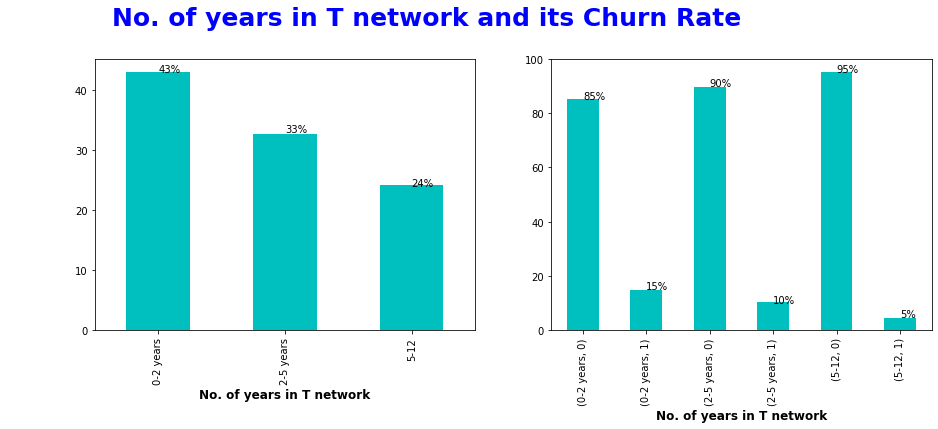

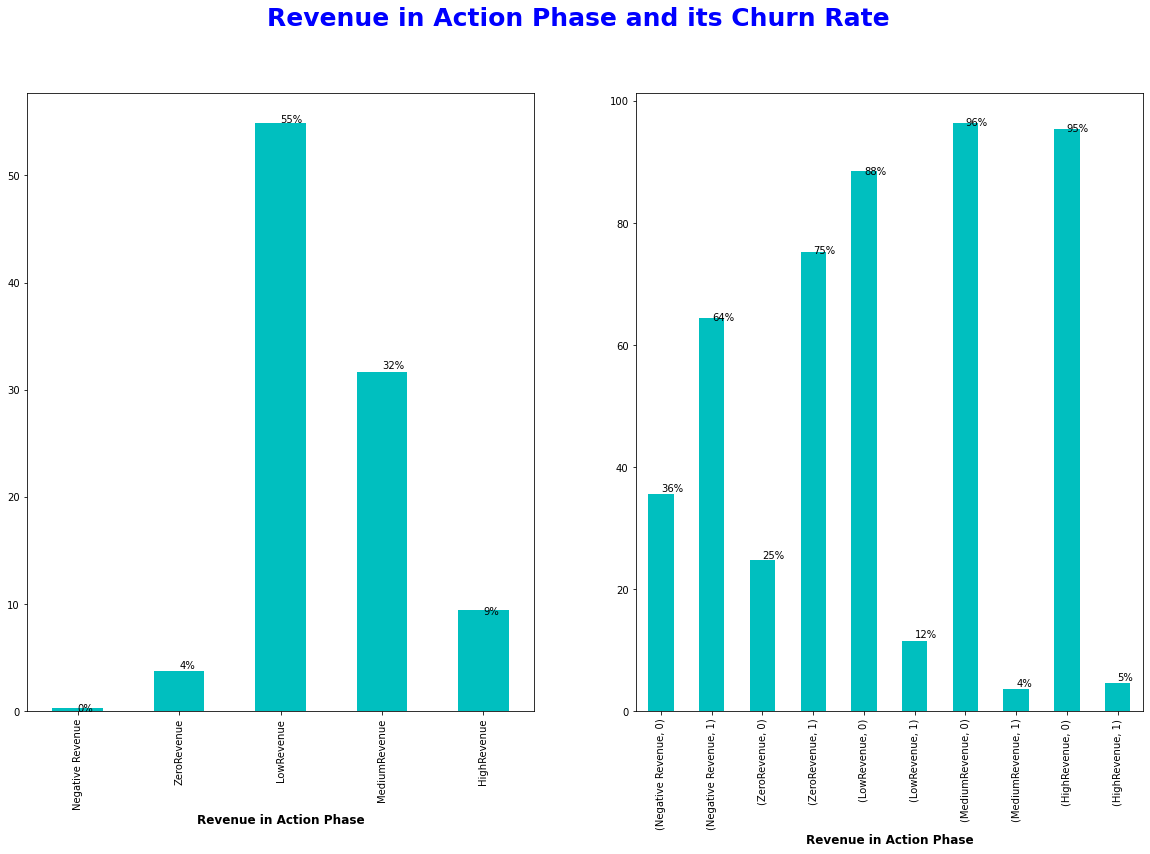

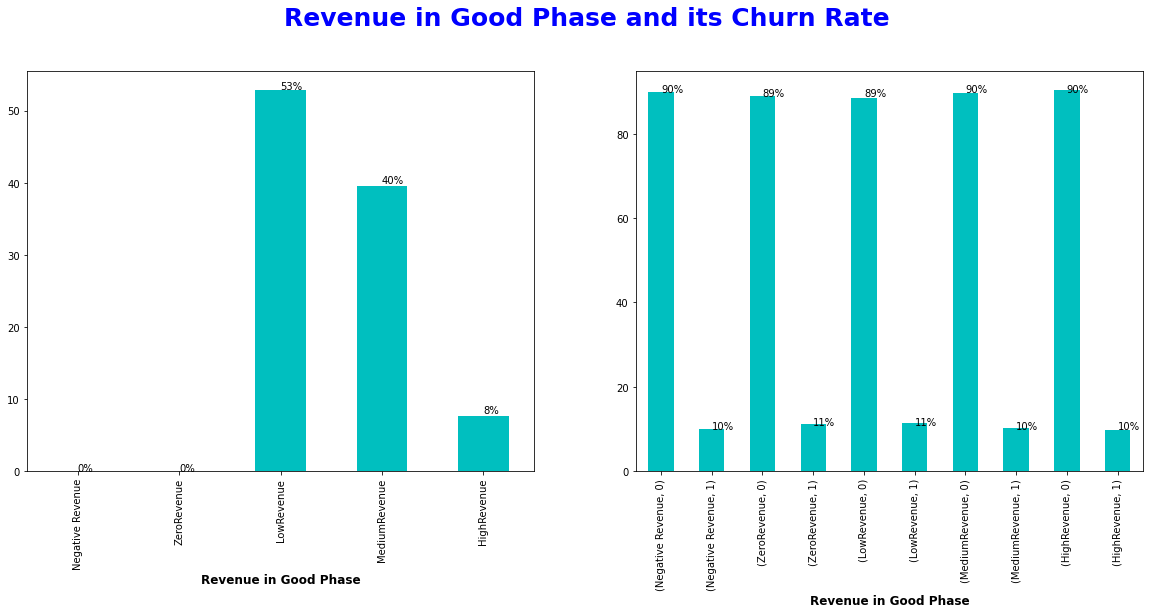

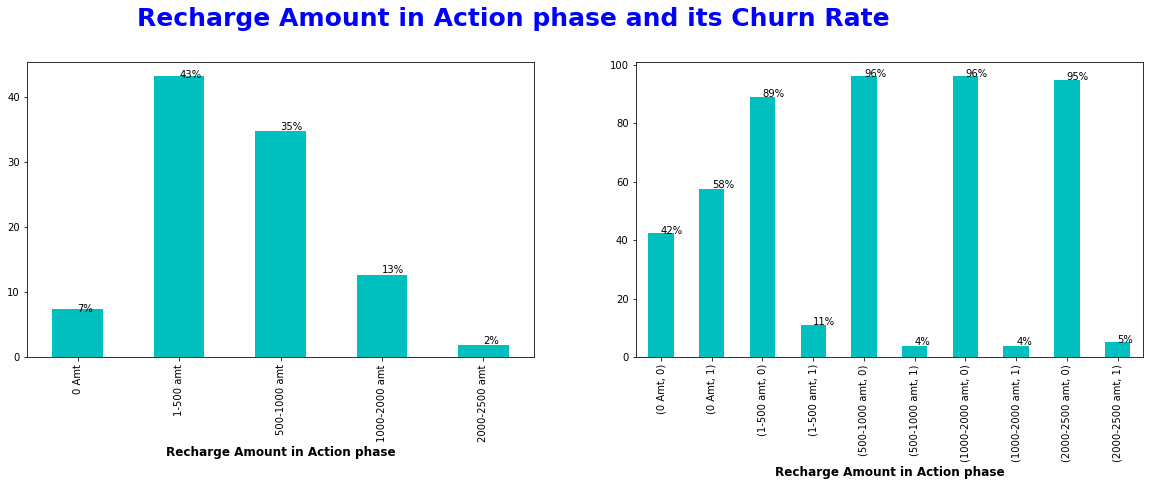

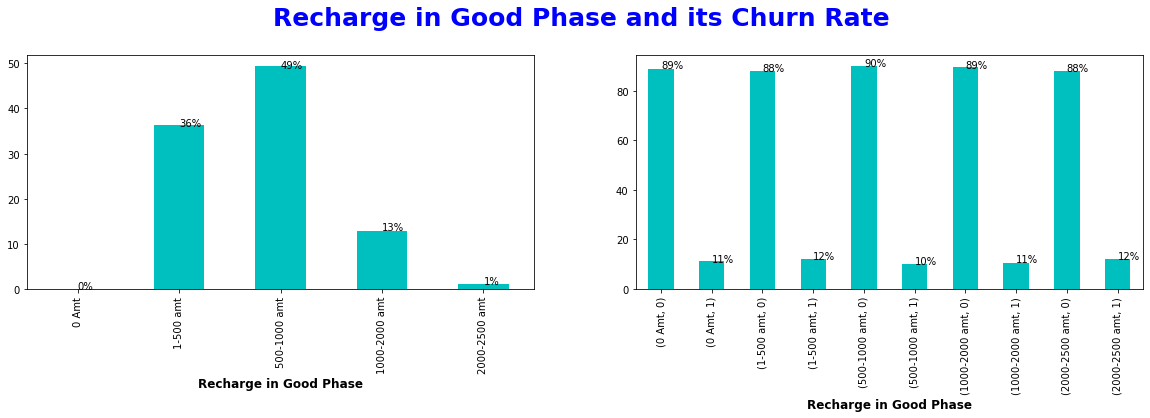

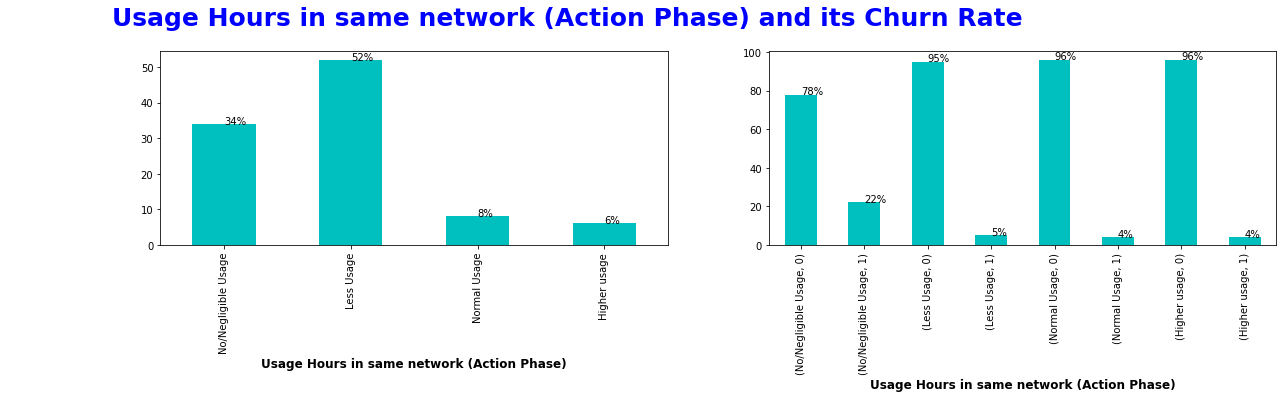

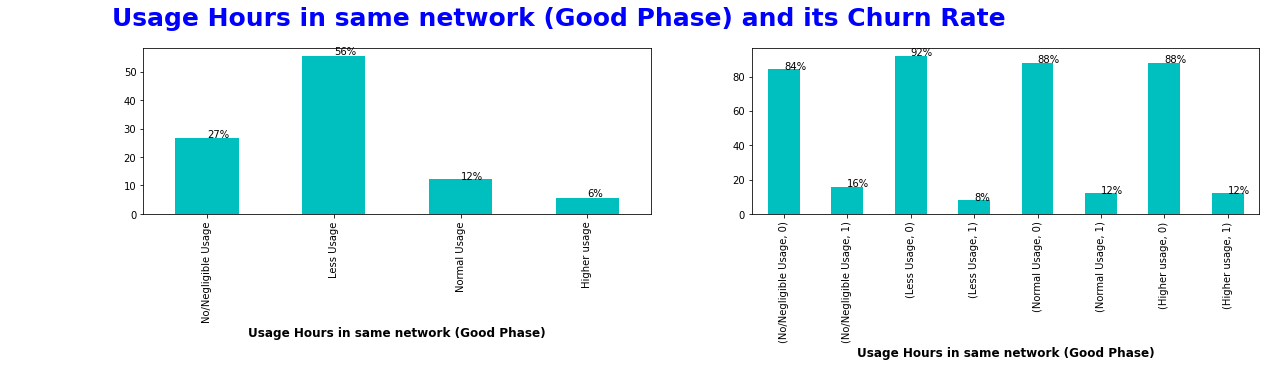

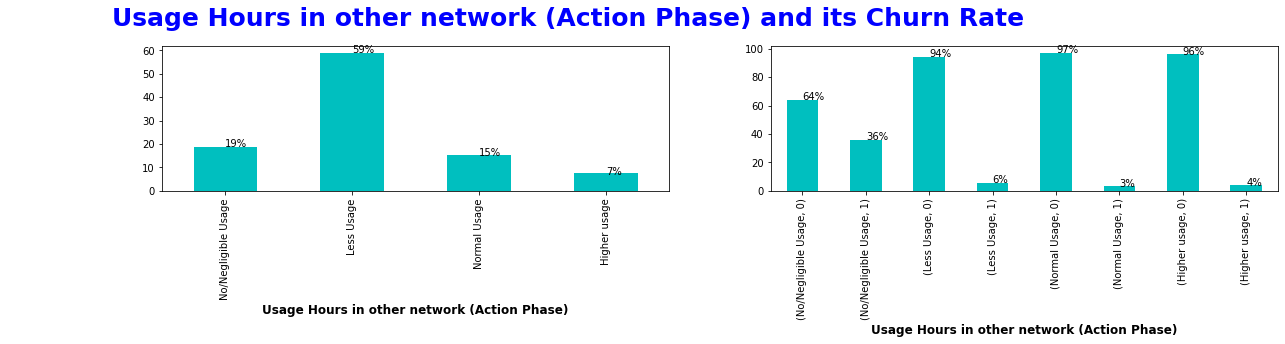

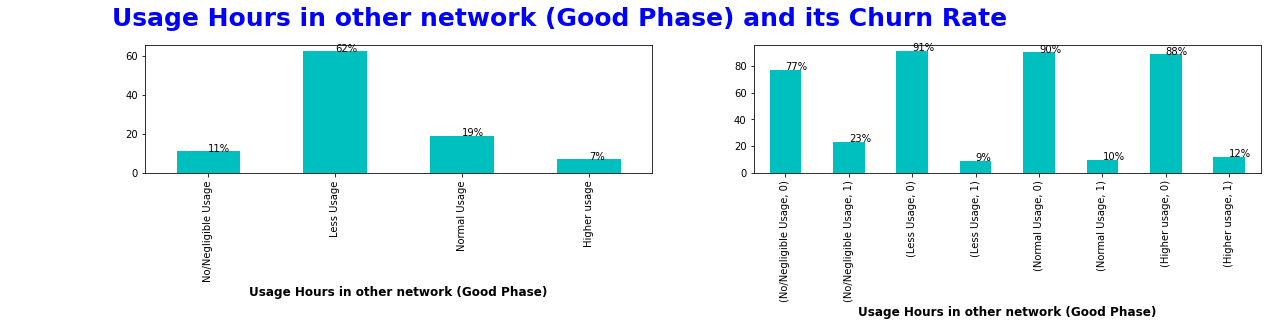

In [98]:
#calculate the percentage of conversion rate under various categories
font={'fontsize': 'large',
 'fontweight' : 'bold',
 'verticalalignment': 'top',
 'horizontalalignment': 'right'}
font1={'fontsize': 'large',
 'fontweight' : 'bold',
 'verticalalignment': 'top',
 'horizontalalignment': 'center'}
my_colors = 'c'
catlist=['Ageinnetwork','Rev_ActionPhase','Rev_GoodPhase','Rech_ActionPhase', 'Rech_GoodPhase', 'onnet_ActionPhase', 
                   'onnet_GoodPhase','offnet_ActionPhase','offnet_GoodPhase']
catdesc=['No. of years in T network','Revenue in Action Phase','Revenue in Good Phase','Recharge Amount in Action phase','Recharge in Good Phase'
         ,'Usage Hours in same network (Action Phase)','Usage Hours in same network (Good Phase)',
        'Usage Hours in other network (Action Phase)','Usage Hours in other network (Good Phase)']
j=0
for i in catlist:
    j=j+1
    if i=='Ageinnetwork':
        fig=plt.figure(figsize=(15,5))
    else:
        fig=plt.figure(figsize=(20,25))
    fig.tight_layout()
    df1=hvcust_EDA.groupby(by=i)['mobile_number'].count()/len(hvcust_EDA['mobile_number'])*100
    plt.subplot(int(str(j)+'21'))
    df1.plot(kind='bar',color=my_colors)
    x=[]
    y=[]
    for z in df1.items():
        x.append(str(z[0]))
        y.append(round(z[1]))
    for index, value in enumerate(y):
        plt.text(index, value, str(value)+'%')
    plt.xlabel(catdesc[j-1],fontdict=font1)
    df2=hvcust_EDA.groupby(by=[i,'isChurn'])['mobile_number'].count()/hvcust_EDA.groupby(by=i)['mobile_number'].count()*100  
    plt.subplot(int(str(j)+'22'))
    df2.plot(kind='bar',color=my_colors)
    x=[]
    y=[]
    for z in df2.items():
        x.append(str(z[0]))
        y.append(round(z[1]))
    for index, value in enumerate(y):
        plt.text(index, value, str(value)+'%')
    plt.xlabel(catdesc[j-1],fontdict=font1)
    plt.title('            '+catdesc[j-1]+' and its Churn Rate', fontsize=25, color= 'blue', fontweight='bold', y= 1.1, horizontalalignment= 'right');
    plt.savefig(catdesc[j-1]+".jpeg",bbox_inches='tight',dpi=150)
    plt.show()


### Observation
1. No.of years in the T network have an impact over Churning, Customer who have recently joined the network have higher chances of churning with 15% (0-2 years), 10% (2-5 years) and 5% (5-12 years). so maximum attention can be given to new customers to avoid churning.
2. It is understood from Revenue per user that it is a clear indicator of increasing churning rate in Action phase if the revenue declines towards zero or negative. However in a Good phase churning rate remain stagnant despite of revenue. 
3. Recharge amount spent is also a clear indicator of increasing churning rate in Action phase if the recharge amount declines towards zero. However in a Good phase churning rate remain stagnant despite of recharge amount spent. 
4. We could understand from Usage hours that less/no usage of calls indicates the churning possiblity. 
5. Customers with more Usage hours to other network than a same networ have a higher churn rate, this could be due to possible influence from thier friends/relatives who use the other network.

In [99]:
#Merging on 'mobile_number'
high_value_customers = pd.merge(high_value_customers, hvcust_EDA, how='inner', on='mobile_number')


In [100]:
high_value_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 30000
Data columns (total 91 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   mobile_number                    30001 non-null  int64   
 1   arpu_8                           30001 non-null  float64 
 2   onnet_mou_8                      30001 non-null  float64 
 3   offnet_mou_8                     30001 non-null  float64 
 4   roam_ic_mou_8                    30001 non-null  float64 
 5   roam_og_mou_8                    30001 non-null  float64 
 6   loc_og_t2t_mou_8                 30001 non-null  float64 
 7   loc_og_t2m_mou_8                 30001 non-null  float64 
 8   loc_og_t2f_mou_8                 30001 non-null  float64 
 9   loc_og_t2c_mou_8                 30001 non-null  float64 
 10  std_og_t2t_mou_8                 30001 non-null  float64 
 11  std_og_t2m_mou_8                 30001 non-null  float64 
 12  std_

In [101]:
high_value_customers.drop(['aon','arpu_8','total_rech_amt_8','avg_arpu_good_phase','avg_total_rech_amt_good_phase',
                                             'onnet_mou_8','offnet_mou_8','avg_onnet_mou_good_phase','avg_offnet_mou_good_phase','isChurn_y'],axis=1,inplace=True)

In [102]:
high_value_customers.rename(columns={'isChurn_x':'isChurn'},inplace=True)

### Dummy Variable Creation

In [103]:
# Creating a dummy variable for the variable 'Ageinnetwork' and dropping the first one.
cont = pd.get_dummies(high_value_customers['Ageinnetwork'],prefix='Age',drop_first=True)
#Adding the results to the master dataframe
high_value_customers = pd.concat([high_value_customers,cont],axis=1)

# Creating a dummy variable for the variable 'Rev_ActionPhase' and dropping the first one.
cont = pd.get_dummies(high_value_customers['Rev_ActionPhase'],prefix='RevAct',drop_first=True)
#Adding the results to the master dataframe
high_value_customers = pd.concat([high_value_customers,cont],axis=1)

# Creating a dummy variable for the variable 'Rev_GoodPhase' and dropping the first one.
cont = pd.get_dummies(high_value_customers['Rev_GoodPhase'],prefix='RevGd',drop_first=True)
#Adding the results to the master dataframe
high_value_customers = pd.concat([high_value_customers,cont],axis=1)

# Creating a dummy variable for the variable 'Rech_ActionPhase' and dropping the first one.
cont = pd.get_dummies(high_value_customers['Rech_ActionPhase'],prefix='RechAct',drop_first=True)
#Adding the results to the master dataframe
high_value_customers = pd.concat([high_value_customers,cont],axis=1)

# Creating a dummy variable for the variable 'Rev_GoodPhase' and dropping the first one.
cont = pd.get_dummies(high_value_customers['Rech_GoodPhase'],prefix='RechGd',drop_first=True)
#Adding the results to the master dataframe
high_value_customers = pd.concat([high_value_customers,cont],axis=1)

# Creating a dummy variable for the variable 'onnet_ActionPhase' and dropping the first one.
cont = pd.get_dummies(high_value_customers['onnet_ActionPhase'],prefix='OnnetAct',drop_first=True)
#Adding the results to the master dataframe
high_value_customers = pd.concat([high_value_customers,cont],axis=1)

# Creating a dummy variable for the variable 'onnet_GoodPhase' and dropping the first one.
cont = pd.get_dummies(high_value_customers['onnet_GoodPhase'],prefix='OnnetGd',drop_first=True)
#Adding the results to the master dataframe
high_value_customers = pd.concat([high_value_customers,cont],axis=1)

# Creating a dummy variable for the variable 'offnet_ActionPhase' and dropping the first one.
cont = pd.get_dummies(high_value_customers['offnet_ActionPhase'],prefix='OffnetAct',drop_first=True)
#Adding the results to the master dataframe
high_value_customers = pd.concat([high_value_customers,cont],axis=1)

# Creating a dummy variable for the variable 'offnet_GoodPhase' and dropping the first one.
cont = pd.get_dummies(high_value_customers['offnet_GoodPhase'],prefix='OffnetGd',drop_first=True)
#Adding the results to the master dataframe
high_value_customers = pd.concat([high_value_customers,cont],axis=1)

In [104]:
# We have created dummies for the below variables, so we can drop them
high_value_customers = high_value_customers.drop(['Ageinnetwork','Rev_ActionPhase','Rev_GoodPhase','Rech_ActionPhase','Rech_GoodPhase', 'onnet_ActionPhase', 'onnet_GoodPhase', 'offnet_ActionPhase',
       'offnet_GoodPhase'], 1)

In [105]:
high_value_customers.set_index('mobile_number',inplace=True)

In [106]:
high_value_customers.head()

,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,...,OnnetAct_Higher usage,OnnetGd_Less Usage,OnnetGd_Normal Usage,OnnetGd_Higher usage,OffnetAct_Less Usage,OffnetAct_Normal Usage,OffnetAct_Higher usage,OffnetGd_Less Usage,OffnetGd_Normal Usage,OffnetGd_Higher usage
mobile_number,,,,,,,,,,,,,,,,,,,,,
7000842753,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
7000701601,31.64,38.06,40.28,162.28,53.23,0.00,12.01,49.14,16.68,10.01,...,0,1,0,0,1,0,0,0,1,0
7001524846,0.00,0.00,12.49,50.54,0.00,7.15,22.58,75.69,0.00,0.00,...,0,1,0,0,1,0,0,1,0,0
7002124215,0.00,0.00,23.34,104.81,1.58,0.00,61.79,876.99,0.00,0.00,...,0,1,0,0,0,0,1,0,1,0
7000887461,0.00,0.00,33.58,148.56,0.00,17.71,0.00,39.61,0.00,0.00,...,0,1,0,0,1,0,0,1,0,0


## Modelling - Principle Component Analysis (PCA)

#### Test Train split

In [107]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import recall_score,precision_score,roc_auc_score,f1_score,accuracy_score,confusion_matrix

In [108]:
## taking a copy of the high values customers df as a checkpoint
hvc_final_df=high_value_customers.copy()
Y = hvc_final_df["isChurn"]
X = hvc_final_df.drop(["isChurn"],axis=1)

In [109]:
train_size=.7
test_size=.3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, train_size=train_size, random_state=42)


In [110]:
X_train.shape

(21000, 100)

#### Scaling Training Data

In [111]:
##Using standard scaler as very few columns are binary columns
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.fit_transform(X_test)

## Handling class imbalance

In [112]:
smote = SMOTE(random_state=42)
x_tr,y_tr = smote.fit_resample(x_train_scaled,y_train)

#### Applying PCA

In [113]:
pca = PCA(random_state=42)

In [114]:
pca.fit(x_tr)

PCA(random_state=42)

In [115]:
pca.components_

array([[ 9.35716006e-02,  1.06223818e-01,  7.62710148e-02, ...,
        -3.58260426e-02,  1.19358420e-01,  1.38737061e-01],
       [ 1.14995972e-02,  3.44822837e-03,  2.81347469e-02, ...,
        -1.48655504e-03, -4.91869577e-02, -3.84703859e-02],
       [ 1.81930476e-02,  1.76502425e-02, -4.42887134e-02, ...,
        -6.88112546e-02,  5.82991402e-03,  1.05447824e-02],
       ...,
       [-2.80214343e-04, -3.70440152e-04, -7.36257520e-04, ...,
         9.57747121e-04,  1.36146692e-03,  1.27502482e-03],
       [ 3.70955784e-18,  1.64862663e-17,  2.64174633e-16, ...,
         2.32592604e-16,  2.69753289e-16,  2.41550242e-16],
       [ 3.56458088e-17, -3.18144171e-17,  1.86835153e-16, ...,
        -1.04118948e-18,  3.52574485e-18, -9.02482207e-18]])

In [116]:
## Analysing the variance explained by PCA componenets
pca.explained_variance_ratio_

array([9.18655536e-02, 8.30723762e-02, 5.35417635e-02, 4.75647215e-02,
       4.22474769e-02, 3.79277316e-02, 3.12530274e-02, 3.10763015e-02,
       2.73117125e-02, 2.35240140e-02, 1.97886380e-02, 1.90564656e-02,
       1.83655680e-02, 1.78680297e-02, 1.73315508e-02, 1.60339270e-02,
       1.52729965e-02, 1.44521863e-02, 1.40935936e-02, 1.37140172e-02,
       1.34568880e-02, 1.33405243e-02, 1.24218958e-02, 1.21554504e-02,
       1.15682575e-02, 1.12769429e-02, 1.07622499e-02, 1.06240563e-02,
       1.05643001e-02, 9.72618320e-03, 9.29394106e-03, 8.91342339e-03,
       8.86331386e-03, 8.43131029e-03, 8.28344815e-03, 8.24633573e-03,
       7.99286297e-03, 7.96474092e-03, 7.75693123e-03, 7.61598105e-03,
       7.06745898e-03, 7.04769127e-03, 6.94917252e-03, 6.62180729e-03,
       6.42372174e-03, 6.29104445e-03, 6.04629048e-03, 5.85927677e-03,
       5.57804671e-03, 5.29215229e-03, 5.22476656e-03, 5.05240831e-03,
       4.63528192e-03, 4.51493985e-03, 4.43996288e-03, 4.36320683e-03,
      

#### Trying to understand variance using Scree plot with cumulative variance

In [117]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

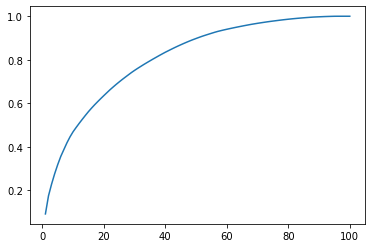

In [118]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [119]:
### trying to get more clarity
cs=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
cs

array([  9.19,  17.5 ,  22.85,  27.61,  31.83,  35.62,  38.75,  41.86,
        44.59,  46.94,  48.92,  50.83,  52.67,  54.46,  56.19,  57.79,
        59.32,  60.77,  62.18,  63.55,  64.9 ,  66.23,  67.47,  68.69,
        69.85,  70.98,  72.06,  73.12,  74.18,  75.15,  76.08,  76.97,
        77.86,  78.7 ,  79.53,  80.35,  81.15,  81.95,  82.73,  83.49,
        84.2 ,  84.9 ,  85.59,  86.25,  86.89,  87.52,  88.12,  88.71,
        89.27,  89.8 ,  90.32,  90.83,  91.29,  91.74,  92.18,  92.62,
        93.03,  93.38,  93.72,  94.04,  94.35,  94.65,  94.95,  95.23,
        95.51,  95.79,  96.05,  96.31,  96.55,  96.78,  97.  ,  97.21,
        97.42,  97.62,  97.8 ,  97.98,  98.16,  98.33,  98.5 ,  98.66,
        98.81,  98.95,  99.08,  99.2 ,  99.32,  99.43,  99.53,  99.63,
        99.7 ,  99.76,  99.82,  99.88,  99.93,  99.97, 100.01, 100.02,
       100.02, 100.02, 100.02, 100.02])

#### Inference:
         - From the cumulative variance and the scree plot... looks like around 70 to 80 components will cover 95% to 97% of the variance. We'll choose 75 components

#### Perform PCA with 75 components

In [120]:
pca_final = IncrementalPCA(n_components=75)

In [121]:
x_train_pca = pca_final.fit_transform(x_tr)

In [122]:
x_train_pca.shape

(37392, 75)

In [123]:
X_test.shape

(9001, 100)

- We now have the final data frame after PCA and class imbalance handling

In [124]:
x_test_pca = pca_final.transform(x_test_scaled)
x_test_pca.shape

(9001, 75)

In [125]:
### Final set for modelling
print(x_train_pca.shape)
print(x_test_pca.shape)
print(y_tr.shape)
print(y_test.shape)

(37392, 75)
(9001, 75)
(37392,)
(9001,)


### Applying logistic regression on the data on our Principal components

In [126]:
from sklearn.linear_model import LogisticRegression

In [127]:
learner_pca = LogisticRegression()

In [128]:
model_pca = learner_pca.fit(x_train_pca, y_tr)

###### Making predictions on the test set

In [129]:
pred_probs_test = model_pca.predict_proba(x_test_pca)

In [130]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.88'

In [131]:
print('AUC on train data by Logistic Regression with PCA =', metrics.roc_auc_score(y_true=y_tr,
                                                              y_score=learner_pca.predict_proba(x_train_pca)[:, 1]))

print('AUC on test data by Logistic Regression with PCA =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=learner_pca.predict_proba(x_test_pca)[:, 1]))

AUC on train data by Logistic Regression with PCA = 0.9097946716410613
AUC on test data by Logistic Regression with PCA = 0.8830110694770478


### Inference:
        - Logistic Regression AUC score: 0.88

#### PCA Unsupervised way

In [132]:
pca_again = PCA(0.9)

In [133]:
x_train_pca2 = pca_again.fit_transform(x_tr)

In [134]:
x_train_pca2.shape

(37392, 51)

In [135]:
learner_pca2 = LogisticRegression()

In [136]:
model_pca2 = learner_pca2.fit(x_train_pca2, y_tr)

In [137]:
x_test_pca2 = pca_again.transform(x_test_scaled)

In [138]:
x_test_pca2.shape

(9001, 51)

In [139]:
pred_probs_test2 = model_pca2.predict_proba(x_test_pca2)[:,1]

In [140]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.87'

In [141]:
print('AUC on train data by Logistic Regression with PCA =', metrics.roc_auc_score(y_true=y_tr,
                                                              y_score=model_pca2.predict_proba(x_train_pca2)[:, 1]))

print('AUC on test data by Logistic Regression with PCA =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=model_pca2.predict_proba(x_test_pca2)[:, 1]))

AUC on train data by Logistic Regression with PCA = 0.9000256525414216
AUC on test data by Logistic Regression with PCA = 0.8735827601358138


## Modelling - XGBoost Classifier

In [142]:
import xgboost as xgb
from sklearn import metrics
## Default
xgclf = xgb.XGBClassifier()

xgclf.fit(x_train_pca, y_tr)

[11:36:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [143]:
#pip install xgboost

In [144]:
print('AUC on train data by XGBoost(Default) =', metrics.roc_auc_score(y_true=y_tr,
                                                              y_score=xgclf.predict_proba(x_train_pca)[:, 1]))

AUC on train data by XGBoost(Default) = 0.9994065035386351


In [145]:
print('AUC on test data by XGBoost(Default) =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=xgclf.predict_proba(x_test_pca)[:, 1]))

AUC on test data by XGBoost(Default) = 0.8530129496045656


#### Metrics XGBoost(Default):

In [146]:
y_pred=xgclf.predict(x_test_pca)

print("Confusion Matrix XGBoost(Default): \n {0}".format(metrics.confusion_matrix(y_test, y_pred)))
# #[TN FP]
# #[FN TP]
print("Accuracy XGBoost(Default): {0}".format(accuracy_score(y_test,y_pred)))
print("Precision XGBoost(Default): {0}".format(precision_score(y_test,y_pred)))  
print("AUC XGBoost(Default): {0}".format(roc_auc_score(y_test,y_pred)))

Confusion Matrix XGBoost(Default): 
 [[7404  635]
 [ 408  554]]
Accuracy XGBoost(Default): 0.8841239862237529
Precision XGBoost(Default): 0.4659377628259041
AUC XGBoost(Default): 0.7484468258818302


### Inference:
       - XGBoost with default parameters has accuracy of .88 and AUC score of .85 for test data. Proceeding with parameter tunning. And also has False positives more than False negatives i.e., model is able to identify churners more than Non churners accurately 

### XGBoost Classifier (Tunning)

In [147]:
xgb_model = xgb.XGBClassifier()


k_folds=5
parameters = {'learning_rate': [0.1,0.2,0.3],
              'max_depth': [2],
              'min_child_weight': [1],
              'n_estimators': [200]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=5,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(x_train_pca, y_tr)

[11:43:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [148]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.3, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 200}
0.937973690164449
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [149]:
### Applying the best model as per gridsearch
xgb_tunned = xgb.XGBClassifier(learning_rate=0.3, max_depth=2, min_child_weight=1, n_estimators=200)
xgb_tunned.fit(x_train_pca, y_tr)

[11:43:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Metrics XGBoost(Tunning):

In [150]:
print('AUC on train data by XGBoost(Tunning) =', metrics.roc_auc_score(y_true=y_tr,
                                                              y_score=xgb_tunned.predict_proba(x_train_pca)[:, 1]))

print('AUC on test data by XGBoost(Tunning) =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=xgb_tunned.predict_proba(x_test_pca)[:, 1]))

AUC on train data by XGBoost(Tunning) = 0.9511400306853214
AUC on test data by XGBoost(Tunning) = 0.867138668326627


In [151]:
y_pred=clf_xgb.predict(x_test_pca)

print("Confusion Matrix XGBoost(Tunning): \n {0}".format(metrics.confusion_matrix(y_test, y_pred)))
# #[TN FP]
# #[FN TP]
print("Accuracy XGBoost(Tunning): {0}".format(accuracy_score(y_test,y_pred)))
print("Precision XGBoost(Tunning): {0}".format(precision_score(y_test,y_pred)))  


Confusion Matrix XGBoost(Tunning): 
 [[6922 1117]
 [ 270  692]]
Accuracy XGBoost(Tunning): 0.8459060104432841
Precision XGBoost(Tunning): 0.3825317855168601


## Modelling - Random Forest (Default)

In [152]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve

In [153]:
rf = RandomForestClassifier()

In [154]:
%%time
randfor= rf.fit(x_train_pca, y_tr)

Wall time: 57.6 s


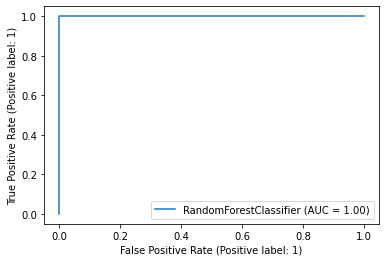

In [155]:
plot_roc_curve(rf, x_train_pca, y_tr)
plt.show()

### Metrics Random Forest(Default):

In [156]:
print('AUC on train data by Random Forest(Default) =', metrics.roc_auc_score(y_true=y_tr,
                                                              y_score=rf.predict_proba(x_train_pca)[:, 1]))

print('AUC on test data by Random Forest(Default) =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=rf.predict_proba(x_test_pca)[:, 1]))

AUC on train data by Random Forest(Default) = 1.0
AUC on test data by Random Forest(Default) = 0.8708284509068188


In [157]:
y_pred=rf.predict(x_test_pca)

print("Confusion Matrix Random Forest(Default): \n {0}".format(metrics.confusion_matrix(y_test, y_pred)))
# #[TN FP]
# #[FN TP]
print("Accuracy Random Forest(Default): {0}".format(accuracy_score(y_test,y_pred)))
print("Precision Random Forest(Default): {0}".format(precision_score(y_test,y_pred)))  

Confusion Matrix Random Forest(Default): 
 [[7623  416]
 [ 480  482]]
Accuracy Random Forest(Default): 0.9004555049438951
Precision Random Forest(Default): 0.5367483296213809


### Random Forest (Tunning):

In [158]:
# Trying Hyper parameter tuning
# parameters = {
#     'max_depth': [12,15, 18, 20],
#     'n_estimators': [200],
#     'max_features': [40],
#     'min_samples_leaf': [10,20],
#     'min_samples_split': [10,20,30]
# }

##Tried with above parameters... taking a long time... hence based on results tried above reduced parameters to below 

parameters = {
    'max_depth': [20],
    'n_estimators': [200],
    'max_features': [40],
    'min_samples_leaf': [10,20],
    'min_samples_split': [10,20,30]
}
# Create a based model
rf = RandomForestClassifier()
k_folds=5
# Instantiate the grid search model
rf_grid_search = model_selection.GridSearchCV(estimator = rf, param_grid = parameters, 
                          cv = k_folds, n_jobs = -1,verbose = 1,return_train_score=True)

In [159]:
## Commenting code as it takes a long time to fit 60 fits as well as 30 fits. It worked once, hence caching the results as commnets
#rf_grid_search.fit(x_train_pca, y_tr)

# Results:
#     GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
#              param_grid={'max_depth': [20], 'max_features': [40],
#                          'min_samples_leaf': [10, 20],
#                          'min_samples_split': [10, 20, 30],
#                          'n_estimators': [200]},
#             return_train_score=True, verbose=1)

In [160]:
#print(rf_grid_search.best_params_)
#print(rf_grid_search.best_score_)
#print(rf_grid_search.best_estimator_)

In [161]:
## worked one time hence caching the result here, which is used for the next step
# print(rf_grid_search.best_params_)
# print(rf_grid_search.best_score_)
# print(rf_grid_search.best_estimator_)

# ##REsult
# {'max_depth': 20, 'max_features': 40, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 200}
# 0.9279531515916849
# RandomForestClassifier(max_depth=20, max_features=40, min_samples_leaf=10,
#                        min_samples_split=20, n_estimators=200)

In [162]:
### Fitting with the best score model obtained above
rfc = RandomForestClassifier(max_depth=20,
                             max_features=40,
                             min_samples_leaf=10,
                             min_samples_split=20,
                             n_estimators=200,
                             n_jobs = -1)
rfc.fit(x_train_pca,y_tr)

RandomForestClassifier(max_depth=20, max_features=40, min_samples_leaf=10,
                       min_samples_split=20, n_estimators=200, n_jobs=-1)

In [163]:
# Making predictions
y_test_pred = rfc.predict(x_test_pca)

#### Metrics Random Forest(Tunning):

In [164]:
print('AUC on train data by Random Forest(Tunning) =', metrics.roc_auc_score(y_true=y_tr,
                                                              y_score=rfc.predict_proba(x_train_pca)[:, 1]))

print('AUC on test data by Random Forest(Tunning) =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=rfc.predict_proba(x_test_pca)[:, 1]))

AUC on train data by Random Forest(Tunning) = 0.9944618936426509
AUC on test data by Random Forest(Tunning) = 0.8813973149089457


In [165]:
print("Confusion Matrix Random Forest(Tunning): \n {0}".format(metrics.confusion_matrix(y_test, y_test_pred)))
# #[TN FP]
# #[FN TP]
print("Accuracy Random Forest(Tunning): {0}".format(accuracy_score(y_test,y_test_pred)))
print("Precision Random Forest(Tunning): {0}".format(precision_score(y_test,y_test_pred)))  

Confusion Matrix Random Forest(Tunning): 
 [[7402  637]
 [ 356  606]]
Accuracy Random Forest(Tunning): 0.8896789245639374
Precision Random Forest(Tunning): 0.48753016894609813


In [166]:
rfc.feature_importances_

array([0.03977276, 0.11389198, 0.15365842, 0.02470246, 0.10249216,
       0.00699355, 0.02648179, 0.00566271, 0.00976494, 0.02609701,
       0.01808869, 0.00423243, 0.0171685 , 0.01207901, 0.01313913,
       0.00763352, 0.00649394, 0.02266272, 0.00609446, 0.00517762,
       0.00566111, 0.00721385, 0.00418828, 0.01099926, 0.00660916,
       0.00745805, 0.00536632, 0.0078152 , 0.00564097, 0.00753521,
       0.00601817, 0.0147145 , 0.00620405, 0.00536506, 0.00667863,
       0.00536347, 0.0053054 , 0.00590592, 0.00471624, 0.00599338,
       0.00458367, 0.00921368, 0.01934365, 0.00513787, 0.00487198,
       0.0128765 , 0.00644917, 0.01733761, 0.00561017, 0.00469095,
       0.00759259, 0.01051011, 0.00662804, 0.00559704, 0.00647119,
       0.00473349, 0.00488918, 0.00572973, 0.00558667, 0.00563997,
       0.00645056, 0.00563873, 0.00777168, 0.00410876, 0.01079238,
       0.00622989, 0.0043883 , 0.00461031, 0.00684778, 0.00482936,
       0.00477861, 0.00444664, 0.00471719, 0.00842431, 0.00543

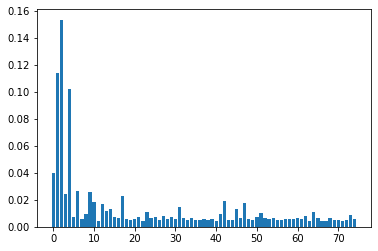

In [167]:

plt.bar(range(len(rfc.feature_importances_)), rfc.feature_importances_)
plt.show()

## Modelling - Decision Tree

In [168]:
from sklearn.tree import DecisionTreeClassifier

In [169]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [170]:
dectree=dt_base.fit(X_train, y_train)

In [171]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [172]:
from sklearn.metrics import classification_report

In [173]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      8039
           1       0.74      0.44      0.55       962

    accuracy                           0.92      9001
   macro avg       0.84      0.71      0.75      9001
weighted avg       0.91      0.92      0.91      9001



#### Plot the ROC curve

In [174]:
from sklearn.metrics import plot_roc_curve

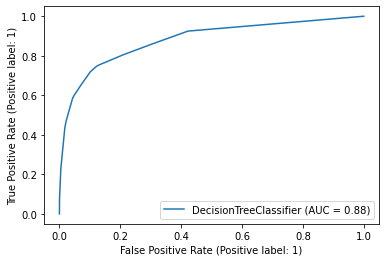

In [175]:
plot_roc_curve(dt_base, X_train, y_train, drop_intermediate=False)
plt.show()

In [176]:
print('AUC on train data by Decision Tree =', metrics.roc_auc_score(y_true=y_train,
                                                              y_score=dectree.predict_proba(X_train)[:, 1]))

print('AUC on test data by Decision Tree =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=dectree.predict_proba(X_test)[:, 1]))

AUC on train data by Decision Tree = 0.8793909445313616
AUC on test data by Decision Tree = 0.8763463794873175


#### Feature Selection using Decision Tree

In [177]:
dectree.feature_importances_

array([0.        , 0.0191294 , 0.        , 0.09137254, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.70533716, 0.        ,
       0.        , 0.00725885, 0.        , 0.        , 0.        ,
       0.        , 0.0034444 , 0.        , 0.0372926 , 0.        ,
       0.        , 0.02272383, 0.07992656, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01238939, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02112527, 0.        , 0.     

In [178]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": dectree.feature_importances_
})

In [179]:
imp_df.sort_values(by="Imp", ascending=False).head(15)

,Varname,Imp
13,loc_ic_t2m_mou_8,0.705337
3,loc_og_t2m_mou_8,0.091373
27,vol_2g_mb_8,0.079927
23,last_day_rch_amt_8,0.037293
26,av_rech_amt_data_8,0.022724
72,RevAct_ZeroRevenue,0.021125
1,roam_og_mou_8,0.019129
33,vbc_3g_8,0.012389
16,std_ic_t2m_mou_8,0.007259
21,total_rech_num_8,0.003444


## Conclusion / Recommendations

### Results of Various Model

#### 1. Logistic Regression with PCA
- AUC on train data by Logistic Regression with PCA = 0.9097946716410613
- AUC on test data by Logistic Regression with PCA = 0.8830110694770478

#### 2. XGBoost Classifier (Default)
- AUC on train data by XGBoost(Default) = 0.999406503538635
- AUC on test data by XGBoost(Default) = 0.8530129496045656

#### 3. XGBoost Classifier (Tunned)
- AUC on train data by XGBoost(Tunning) = 0.951140032115771
- AUC on test data by XGBoost(Tunning) = 0.8671386036729984

#### 4. Random Forest (Default)
- AUC on train data by Random Forest(Default) = 1.0
- AUC on test data by Random Forest(Default) = 0.8735906478784946

#### 5. Random Forest (Tunned)
- AUC on train data by Random Forest(Tunning) = 0.9944467823715126
- AUC on test data by Random Forest(Tunning) = 0.8801361812308448

#### 6. Decision Tree(Feature Importance) without PCA
- AUC on train data by Decision Tree = 0.8793909445313616
- AUC on test data by Decision Tree = 0.8763463794873175

### Business Insights

-  It is clear from Decision Tree model important features that local incoming calls from other network and outgoing calls to other network have a significant impact over churning.
- No.of years in the T network have an impact over Churning, Customer who have recently joined the network have higher chances of churning with 15% (0-2 years), 10% (2-5 years) and 5% (5-12 years). so maximum attention can be given to new customers to avoid churning.
- Revenue per user is a clear indicator of increasing churning rate in Action phase in case of declining revenue towards zero or negative. However in a Good phase churning rate remain stagnant despite of revenue. 
- Recharge amount spent is also a clear indicator of increasing churning rate in Action phase if the recharge amount declines towards zero. However in a Good phase churning rate remain stagnant despite of recharge amount spent. 
- We could understand from Usage hours that less/no usage of calls indicates the churning possiblity. 
- Customers with more Usage hours to other network than a same network have a higher churn rate, this could be due to possible influence from their friends/relatives who use the other network. So closed user Group (CUG) offers can be shared with such customers.
- Model insights: Random forest(Default) seems to be a little overfitting and False Negatives are more than False Positives. But we need to predict Churners correctly more than Non-churners. Hence., we can either go with XGBoost(Tunned) or Random forest(Tunned)... which on further tunning, would provide more accuracy.
